<a href="https://colab.research.google.com/github/GeniusJr001/MachIne_learning/blob/main/Location_Based_Recommendation_System_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_data_USA (1).csv to cleaned_data_USA (1).csv


In [ ]:
dataset = pd.read_csv('cleaned_data_USA (1).csv')
dataset.head()

Unnamed: 0                                            name  \
0           0                                    Forsyth Park   
1           1  The Cathedral Basilica of St. John the Baptist   
2           2                  Fort Pulaski National Monument   
3           3                        Fountain at Forsyth Park   
4           4                    Wormsloe State Historic Site   

             main_category  rating  reviews  \
0                     Park     4.8  16538.0   
1       Catholic cathedral     4.8   5911.0   
2                 Monument     4.8   5221.0   
3      Historical landmark     4.8   4234.0   
4  Historical place museum     4.5   3615.0   

                                          categories  \
0                           Park, Tourist attraction   
1  Catholic cathedral, Catholic church, Tourist a...   
2  Monument, Historical place, Historical landmar...   
3            Historical landmark, Tourist attraction   
4  Historical place museum, Museum, Park, State park   

                                             address      city country state  \
0                   Forsyth Park, Savannah, GA 31401  Savannah     USA    GA   
1  The Cathedral Basilica of St. John the Baptist...  Savannah     USA    GA   
2  Fort Pulaski National Monument, 101 Fort Pulas...  Savannah     USA    GA   
3  Fountain at Forsyth Park, 1 W Gaston St, Savan...  Savannah     USA    GA   
4  Wormsloe State Historic Site, 7601 Skidaway Rd...  Savannah     USA    GA   

   zipcode broader_category  Weighted_Score  Weighted_Average  \
0      NaN           Nature         79382.4              4.67   
1      NaN        Religious         28372.8              4.80   
2      NaN         Cultural         25060.8              4.53   
3      NaN         Cultural         20323.2              4.53   
4      NaN         Cultural         16267.5              4.53   

                                All_Cities  
0  Atlanta, Augusta, Chattanooga, Savannah  
1  Atlanta, Augusta, Chattanooga, Savannah  
2  Atlanta, Augusta, Chattanooga, Savannah  
3  Atlanta, Augusta, Chattanooga, Savannah  
4  Atlanta, Augusta, Chattanooga, Savannah

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


In [ ]:
booking_dataset = pd.read_csv('hotel_bookings.csv')
booking_dataset.tail()

index       hotel  is_canceled  lead_time  arrival_date_year  \
119385  119385  City Hotel            0         23               2017   
119386  119386  City Hotel            0        102               2017   
119387  119387  City Hotel            0         34               2017   
119388  119388  City Hotel            0        109               2017   
119389  119389  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  ...  deposit_type  agent  company  \
119385                     5  ...    No Deposit  394.0      NaN   
119386                     5  ...    No Deposit    9.0      NaN   
119387                     5  ...    No Deposit    9.0      NaN   
119388                     5  ...    No Deposit   89.0      NaN   
119389                     7  ...    No Deposit    9.0      NaN   

       days_in_waiting_list customer_type     adr required_car_parking_spaces  \
119385                    0     Transient   96.14                           0   
119386                    0     Transient  225.43                           0   
119387                    0     Transient  157.71                           0   
119388                    0     Transient  104.40                           0   
119389                    0     Transient  151.20                           0   

        total_of_special_requests  reservation_status  reservation_status_date  
119385                          0           Check-Out                 06-09-17  
119386                          2           Check-Out                 07-09-17  
119387                          4           Check-Out                 07-09-17  
119388                          0           Check-Out                 07-09-17  
119389                          2           Check-Out                 07-09-17  

[5 rows x 33 columns]

# **PREPROCESSING**

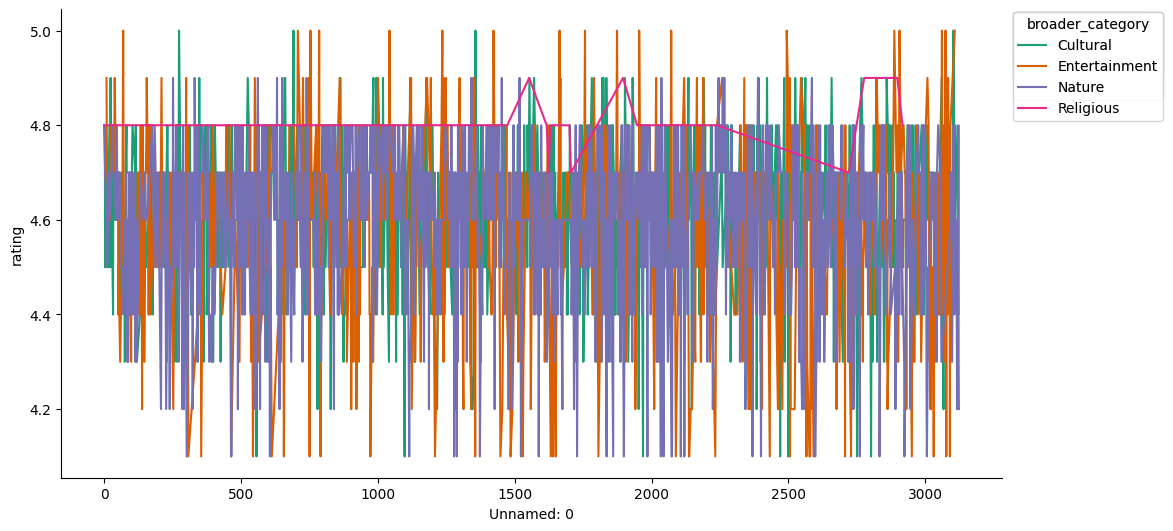

In [ ]:
# @title Unnamed vs rating

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['rating']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataset.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('broader_category')):
  _plot_series(series, series_name, i)
  fig.legend(title='broader_category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('rating')

### DATASET DESCRIPTION

In [ ]:
display(dataset.describe().round(2))

Unnamed: 0   rating    reviews    zipcode  Weighted_Score  \
count     3124.00  3124.00    3124.00       3.00         3124.00   
mean      1561.50     4.60    3091.20  143860.67        14303.29   
std        901.97     0.17   11739.38   48793.85        54871.26   
min          0.00     4.10      51.00  101190.00          217.30   
25%        780.75     4.50     217.00  117261.50          980.70   
50%       1561.50     4.60     607.00  133333.00         2766.90   
75%       2342.25     4.70    1939.00  165196.00         8902.05   
max       3123.00     5.00  272065.00  197059.00      1305912.00   

       Weighted_Average  
count           3124.00  
mean               4.63  
std                0.08  
min                4.20  
25%                4.59  
50%                4.63  
75%                4.69  
max                4.90

In [ ]:
display(booking_dataset.describe().round(2))

index  is_canceled  lead_time  arrival_date_year  \
count  119390.00    119390.00  119390.00          119390.00   
mean    59694.50         0.37     104.01            2016.16   
std     34465.07         0.48     106.86               0.71   
min         0.00         0.00       0.00            2015.00   
25%     29847.25         0.00      18.00            2016.00   
50%     59694.50         0.00      69.00            2016.00   
75%     89541.75         1.00     160.00            2017.00   
max    119389.00         1.00     737.00            2017.00   

       arrival_date_week_number  arrival_date_day_of_month  \
count                 119390.00                  119390.00   
mean                      27.17                      15.80   
std                       13.61                       8.78   
min                        1.00                       1.00   
25%                       16.00                       8.00   
50%                       28.00                      16.00   
75%                       38.00                      23.00   
max                       53.00                      31.00   

       stays_in_weekend_nights  stays_in_week_nights     adults  children  \
count                119390.00             119390.00  119390.00  119386.0   
mean                      0.93                  2.50       1.86       0.1   
std                       1.00                  1.91       0.58       0.4   
min                       0.00                  0.00       0.00       0.0   
25%                       0.00                  1.00       2.00       0.0   
50%                       1.00                  2.00       2.00       0.0   
75%                       2.00                  3.00       2.00       0.0   
max                      19.00                 50.00      55.00      10.0   

       ...  is_repeated_guest  previous_cancellations  \
count  ...          119390.00               119390.00   
mean   ...               0.03                    0.09   
std    ...               0.18                    0.84   
min    ...               0.00                    0.00   
25%    ...               0.00                    0.00   
50%    ...               0.00                    0.00   
75%    ...               0.00                    0.00   
max    ...               1.00                   26.00   

       previous_bookings_not_canceled  booking_changes      agent  company  \
count                       119390.00        119390.00  103050.00  6797.00   
mean                             0.14             0.22      86.69   189.27   
std                              1.50             0.65     110.77   131.66   
min                              0.00             0.00       1.00     6.00   
25%                              0.00             0.00       9.00    62.00   
50%                              0.00             0.00      14.00   179.00   
75%                              0.00             0.00     229.00   270.00   
max                             72.00            21.00     535.00   543.00   

       days_in_waiting_list        adr  required_car_parking_spaces  \
count             119390.00  119390.00                    119390.00   
mean                   2.32     101.83                         0.06   
std                   17.59      50.54                         0.25   
min                    0.00      -6.38                         0.00   
25%                    0.00      69.29                         0.00   
50%                    0.00      94.58                         0.00   
75%                    0.00     126.00                         0.00   
max                  391.00    5400.00                         8.00   

       total_of_special_requests  
count                  119390.00  
mean                        0.57  
std                         0.79  
min                         0.00  
25%                         0.00  
50%                         0.00  
75%                         1.00  
max                         5.00  

[8 rows x 21 colu

In [ ]:
# Combine date columns to create a datetime object
booking_dataset['arrival_date'] = pd.to_datetime(
    booking_dataset['arrival_date_year'].astype(str) + '-' +
    booking_dataset['arrival_date_month'] + '-' +
    booking_dataset['arrival_date_day_of_month'].astype(str)
)

# Select key variables for time series analysis
time_series_vars = ['adults', 'children', 'babies', 'adr']

# Group by arrival date and calculate the sum for counts and mean for adr
time_series_data = booking_dataset.groupby('arrival_date')[time_series_vars].agg({
    'adults': 'sum',
    'children': 'sum',
    'babies': 'sum',
    'adr': 'mean'
})

# Rename columns for clarity
time_series_data.rename(columns={
    'adults': 'total_adults',
    'children': 'total_children',
    'babies': 'total_babies',
    'adr': 'average_daily_rate'
}, inplace=True)

# Display the first few rows of the time series table
display(time_series_data.head())

total_adults  total_children  total_babies  average_daily_rate
arrival_date                                                                
2015-07-01             223             2.0             0           92.828934
2015-07-02             186             4.0             0           82.205484
2015-07-03             112             4.0             0           97.183036
2015-07-04             171             8.0             2           85.582273
2015-07-05             103            10.0             0          100.002642

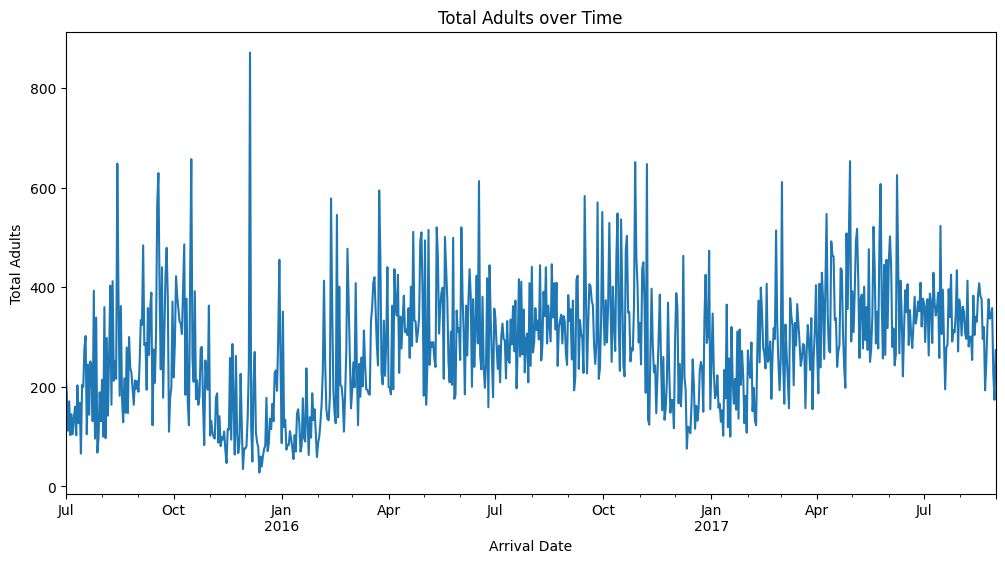

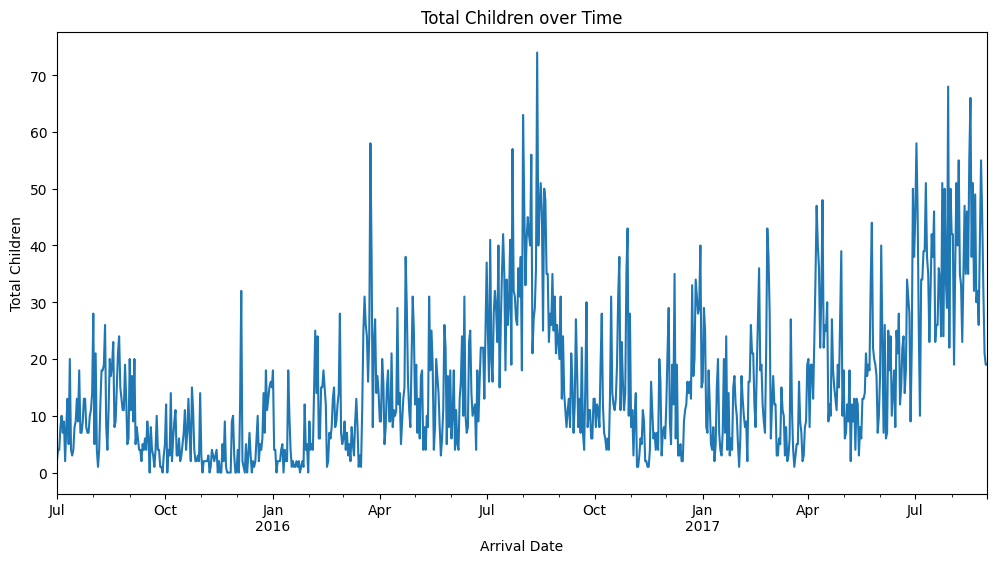

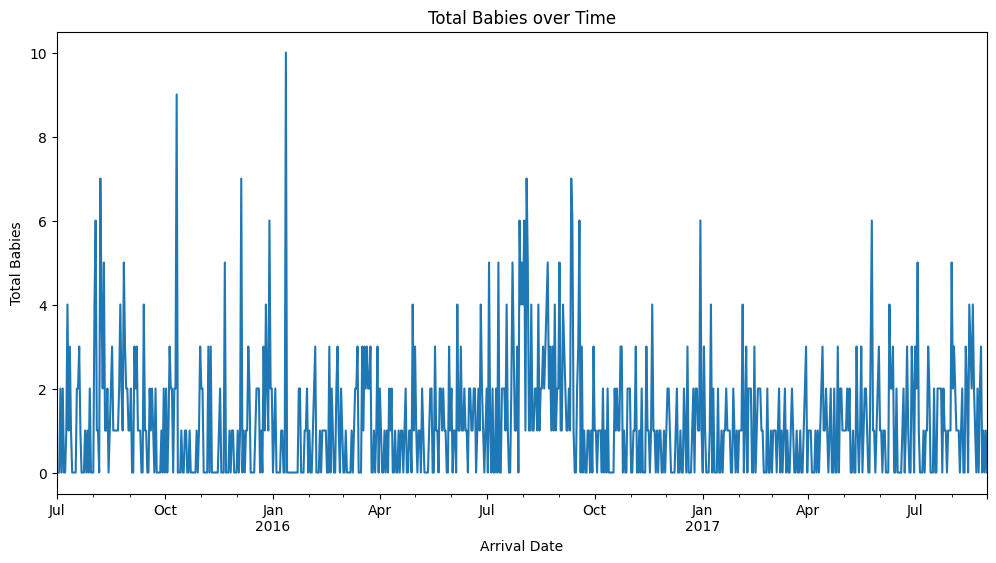

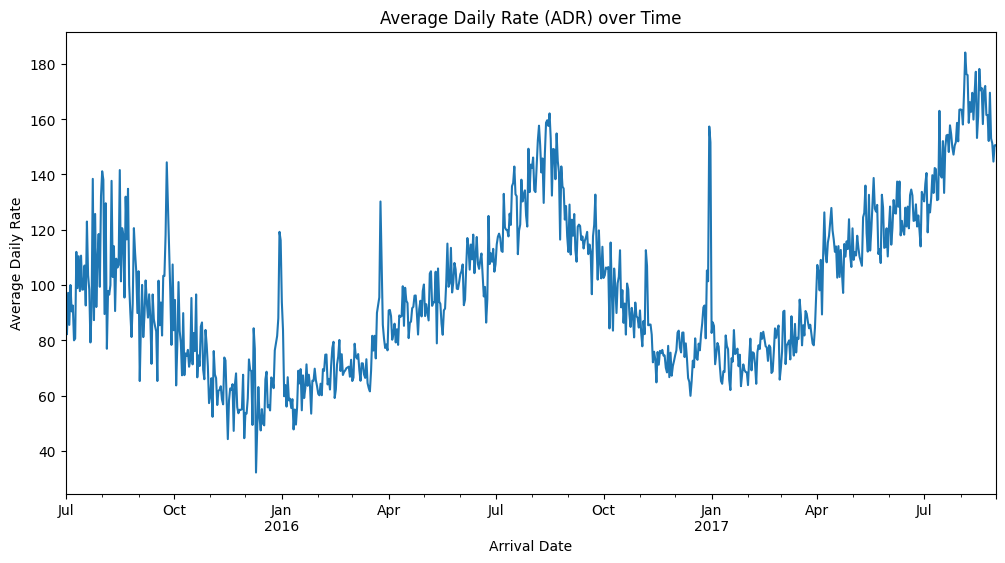

In [ ]:
import matplotlib.pyplot as plt

# Plotting each time series variable
time_series_data['total_adults'].plot(figsize=(12, 6), title='Total Adults over Time')
plt.xlabel('Arrival Date')
plt.ylabel('Total Adults')
plt.show()

time_series_data['total_children'].plot(figsize=(12, 6), title='Total Children over Time')
plt.xlabel('Arrival Date')
plt.ylabel('Total Children')
plt.show()

time_series_data['total_babies'].plot(figsize=(12, 6), title='Total Babies over Time')
plt.xlabel('Arrival Date')
plt.ylabel('Total Babies')
plt.show()

time_series_data['average_daily_rate'].plot(figsize=(12, 6), title='Average Daily Rate (ADR) over Time')
plt.xlabel('Arrival Date')
plt.ylabel('Average Daily Rate')
plt.show()

        Unnamed: 0       rating        reviews        zipcode  Weighted_Score  \
count  3124.000000  3124.000000    3124.000000       3.000000    3.124000e+03   
mean   1561.500000     4.599584    3091.196543  143860.666667    1.430329e+04   
std     901.965446     0.174402   11739.384607   48793.853243    5.487126e+04   
min       0.000000     4.100000      51.000000  101190.000000    2.173000e+02   
25%     780.750000     4.500000     217.000000  117261.500000    9.807000e+02   
50%    1561.500000     4.600000     607.000000  133333.000000    2.766900e+03   
75%    2342.250000     4.700000    1939.000000  165196.000000    8.902050e+03   
max    3123.000000     5.000000  272065.000000  197059.000000    1.305912e+06   

       Weighted_Average  
count       3124.000000  
mean           4.628700  
std            0.082091  
min            4.200000  
25%            4.590000  
50%            4.630000  
75%            4.690000  
max            4.900000  


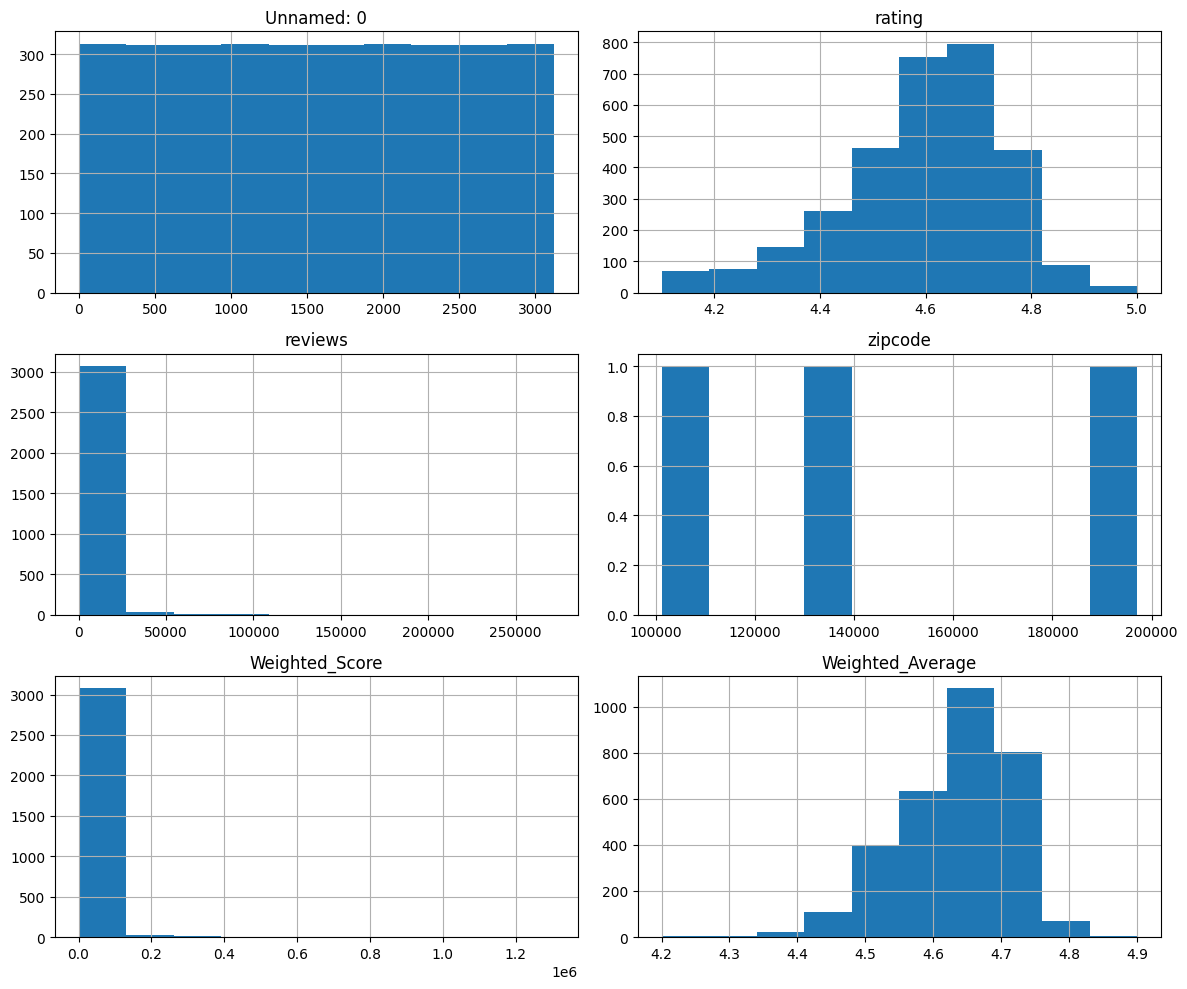

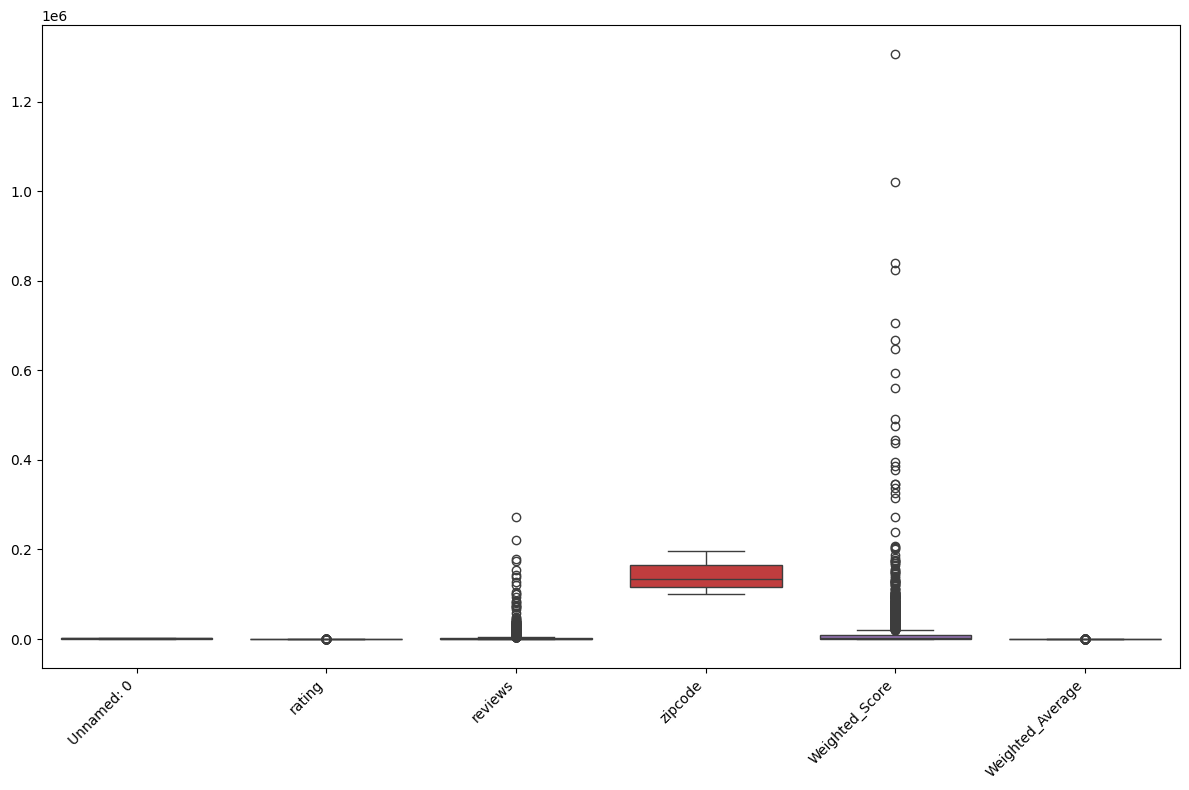

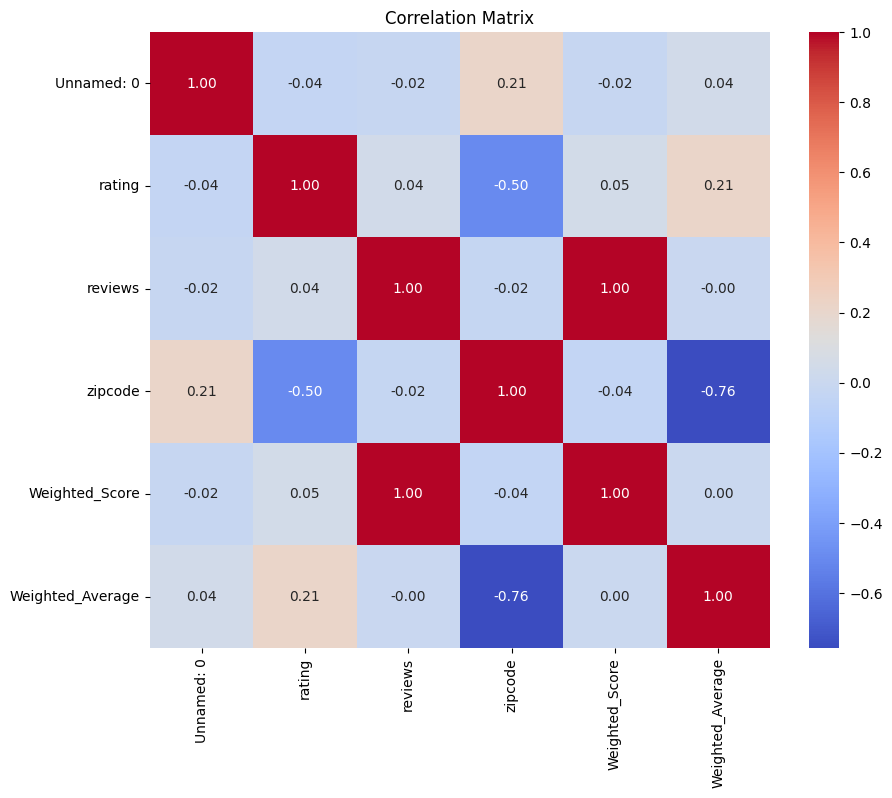

/tmp/ipython-input-8-2546096623.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


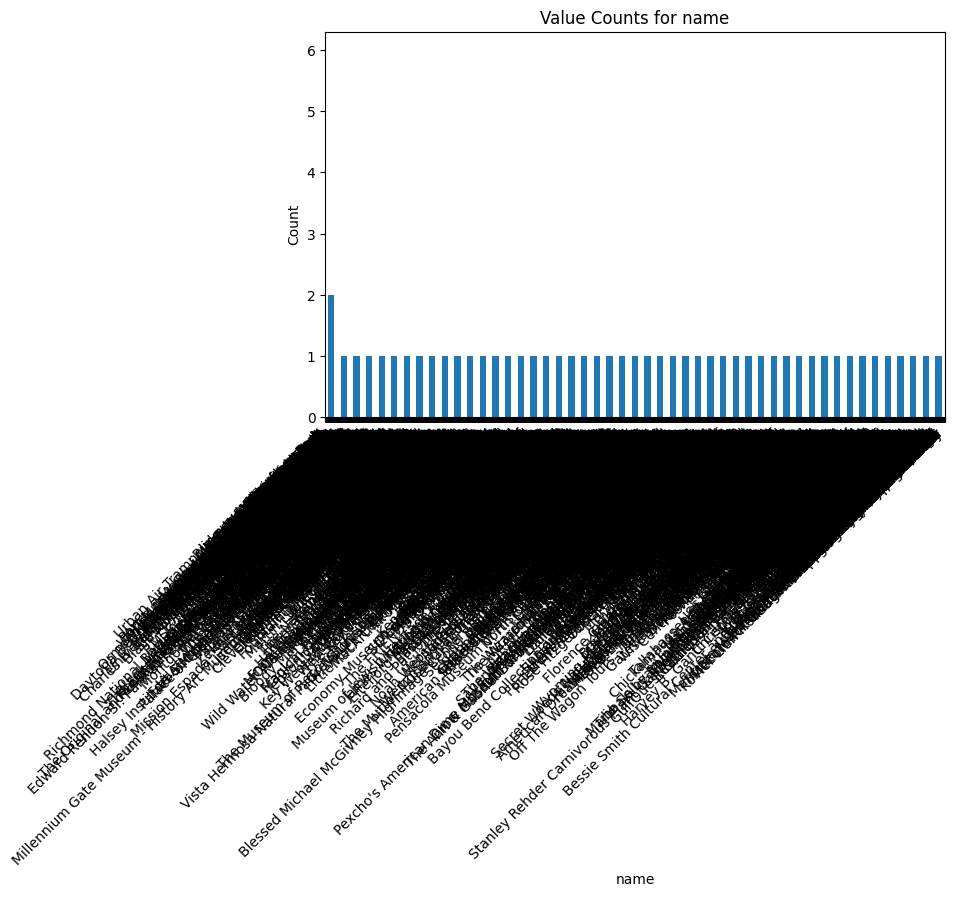

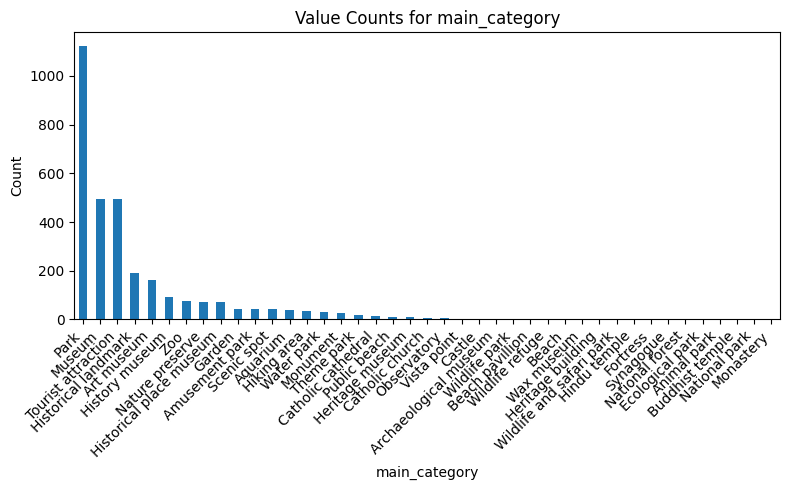

/tmp/ipython-input-8-2546096623.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


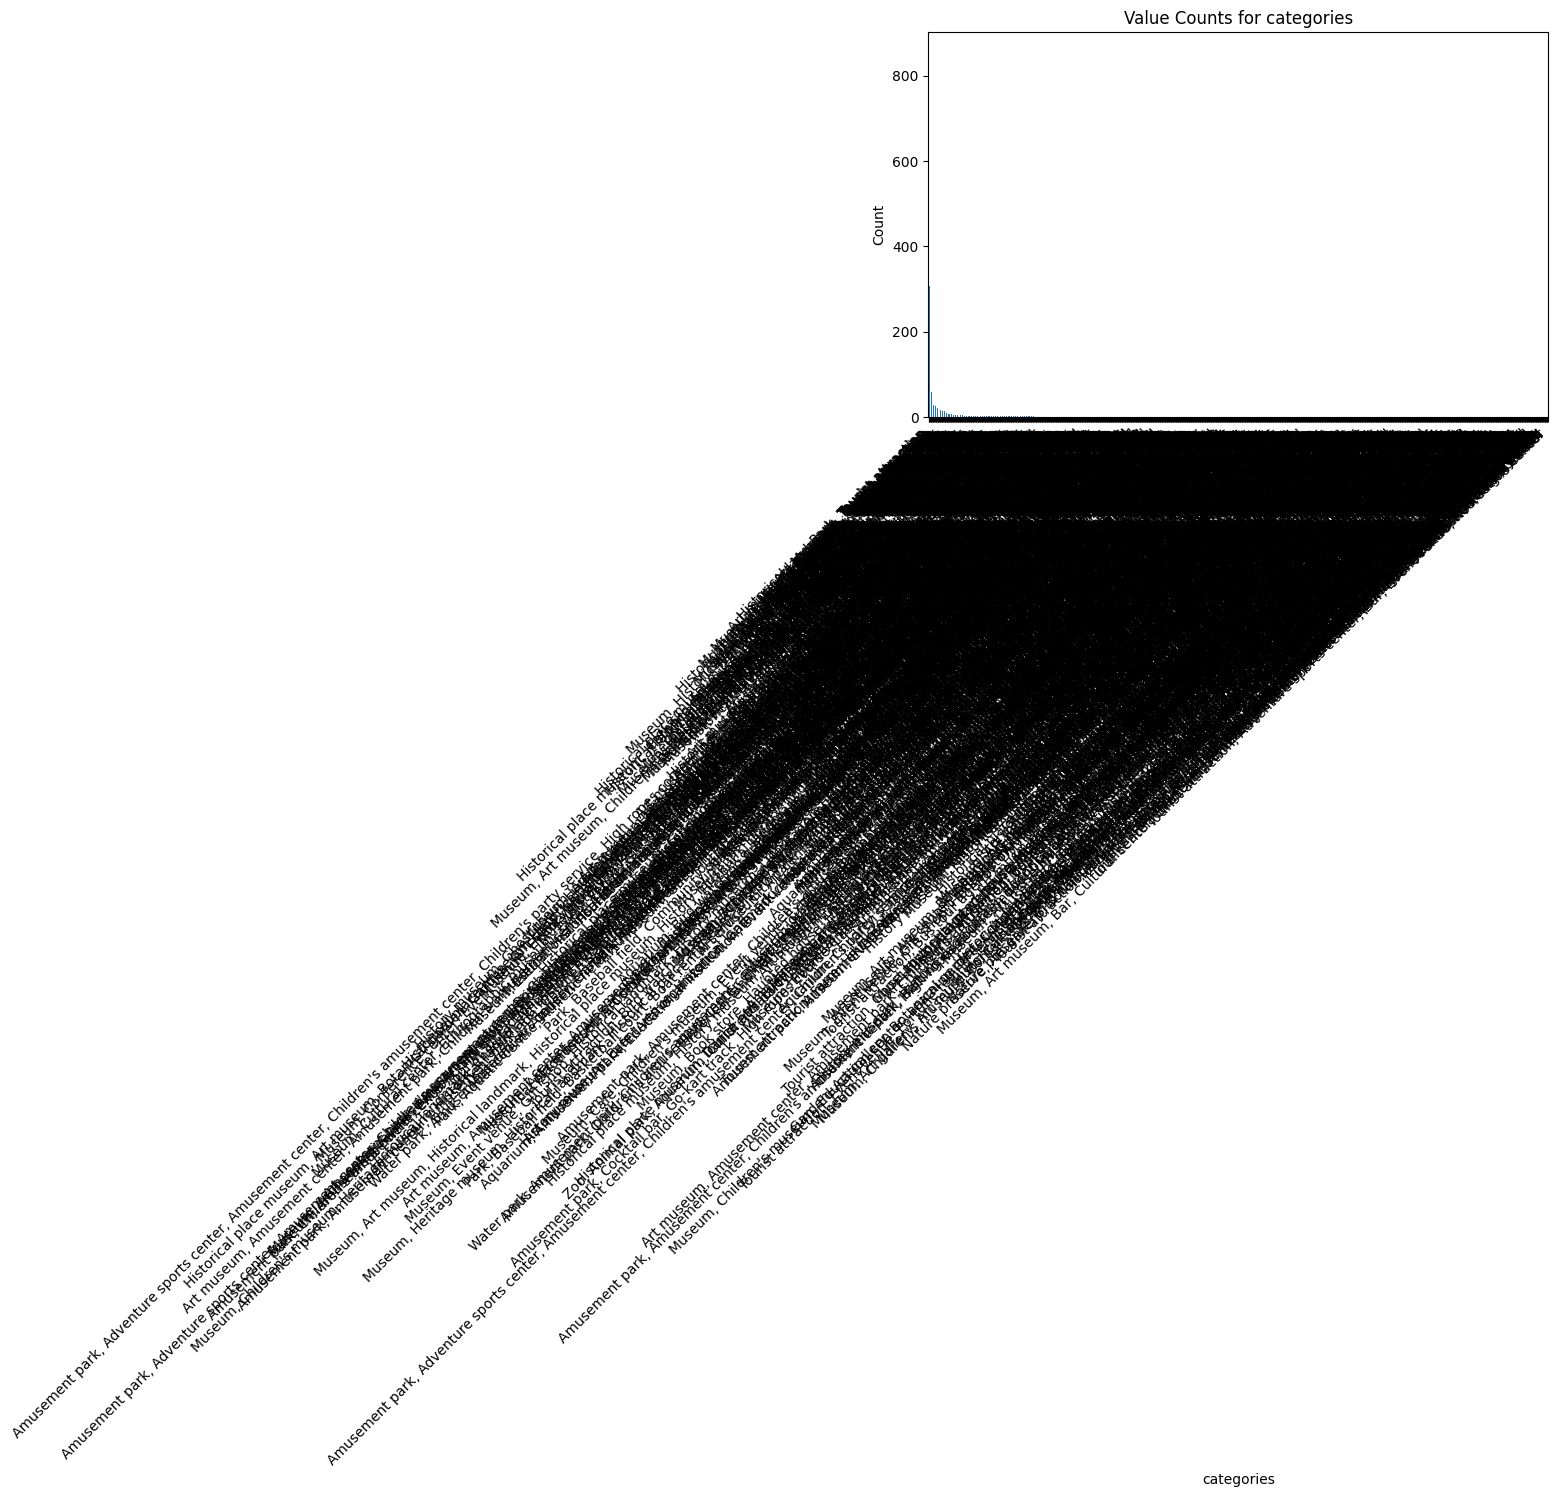

/tmp/ipython-input-8-2546096623.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


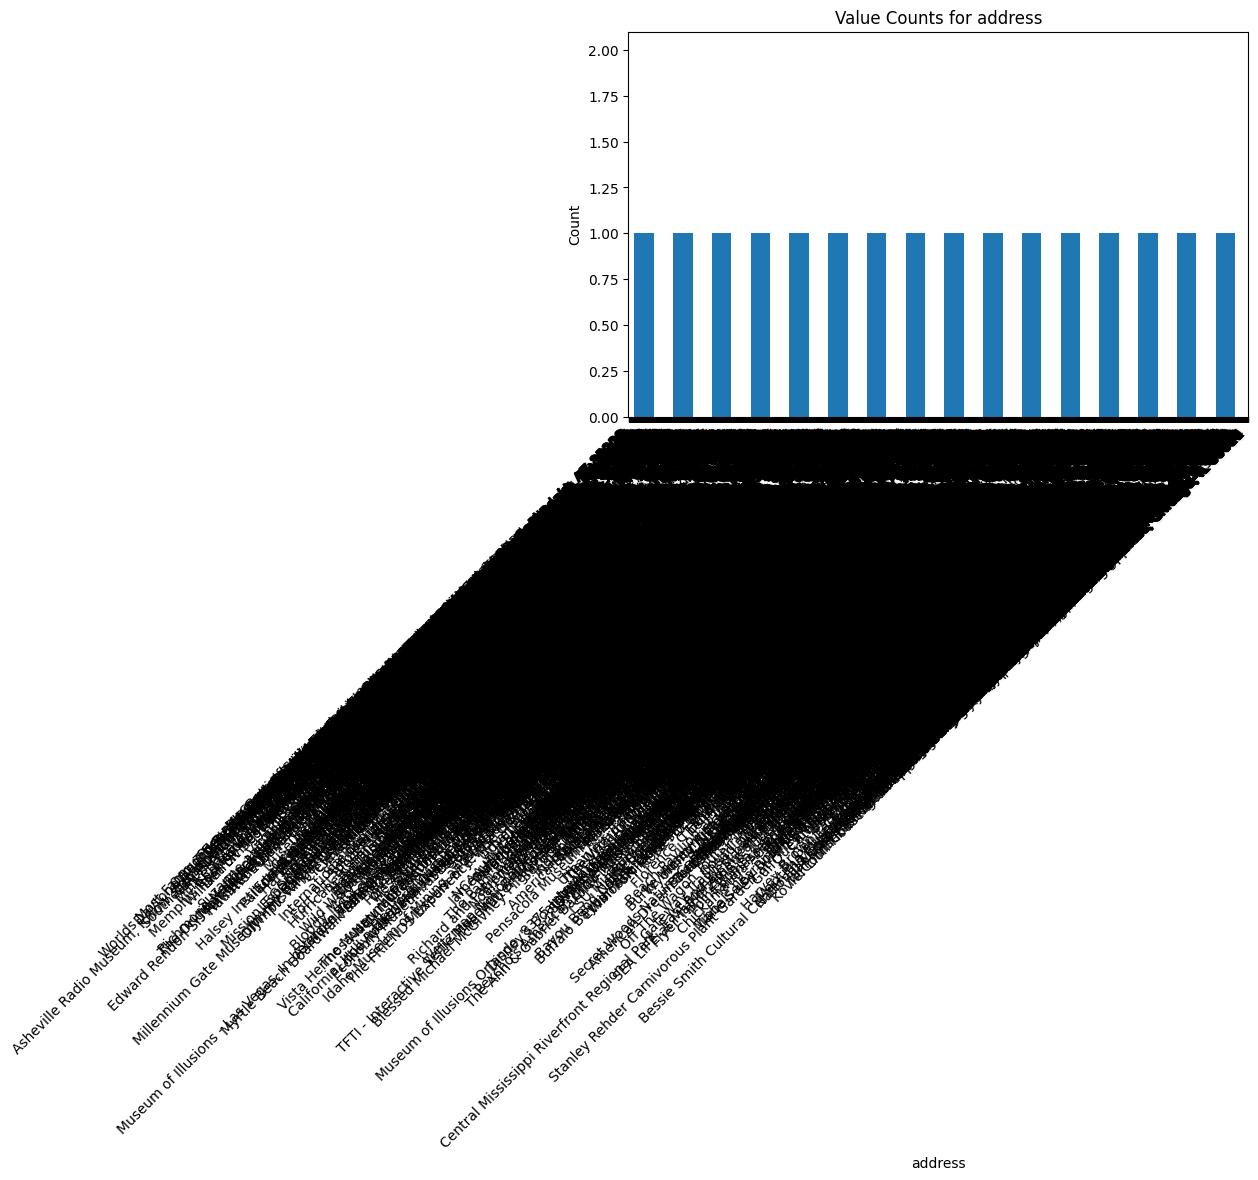

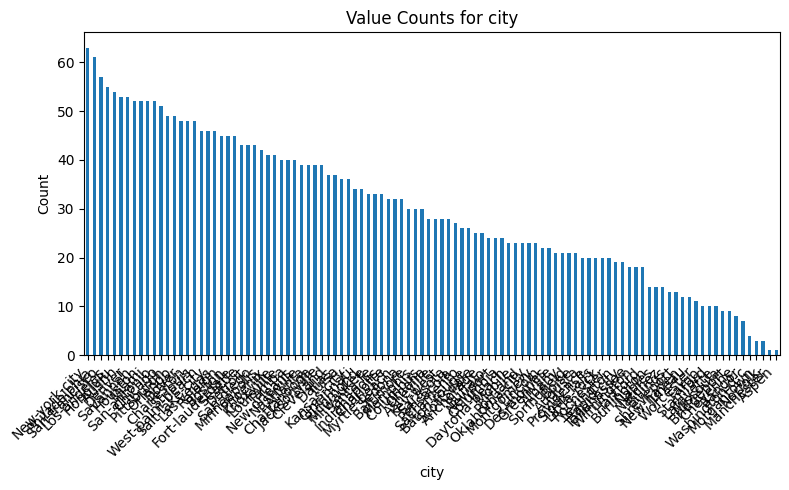

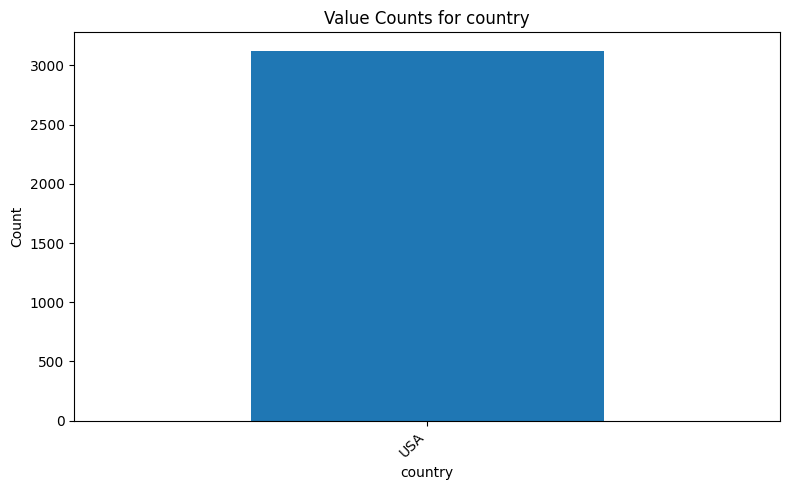

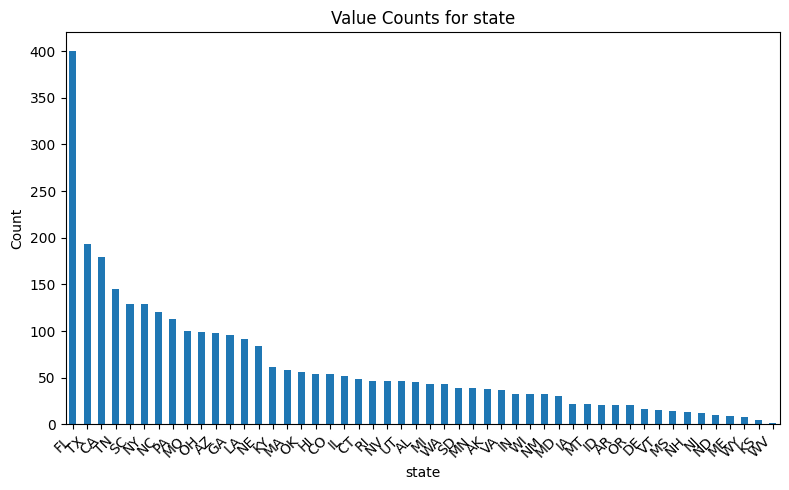

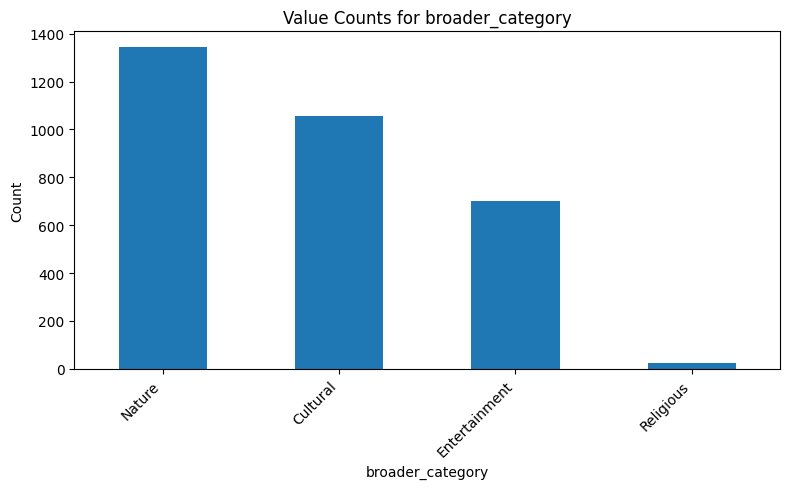

/tmp/ipython-input-8-2546096623.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


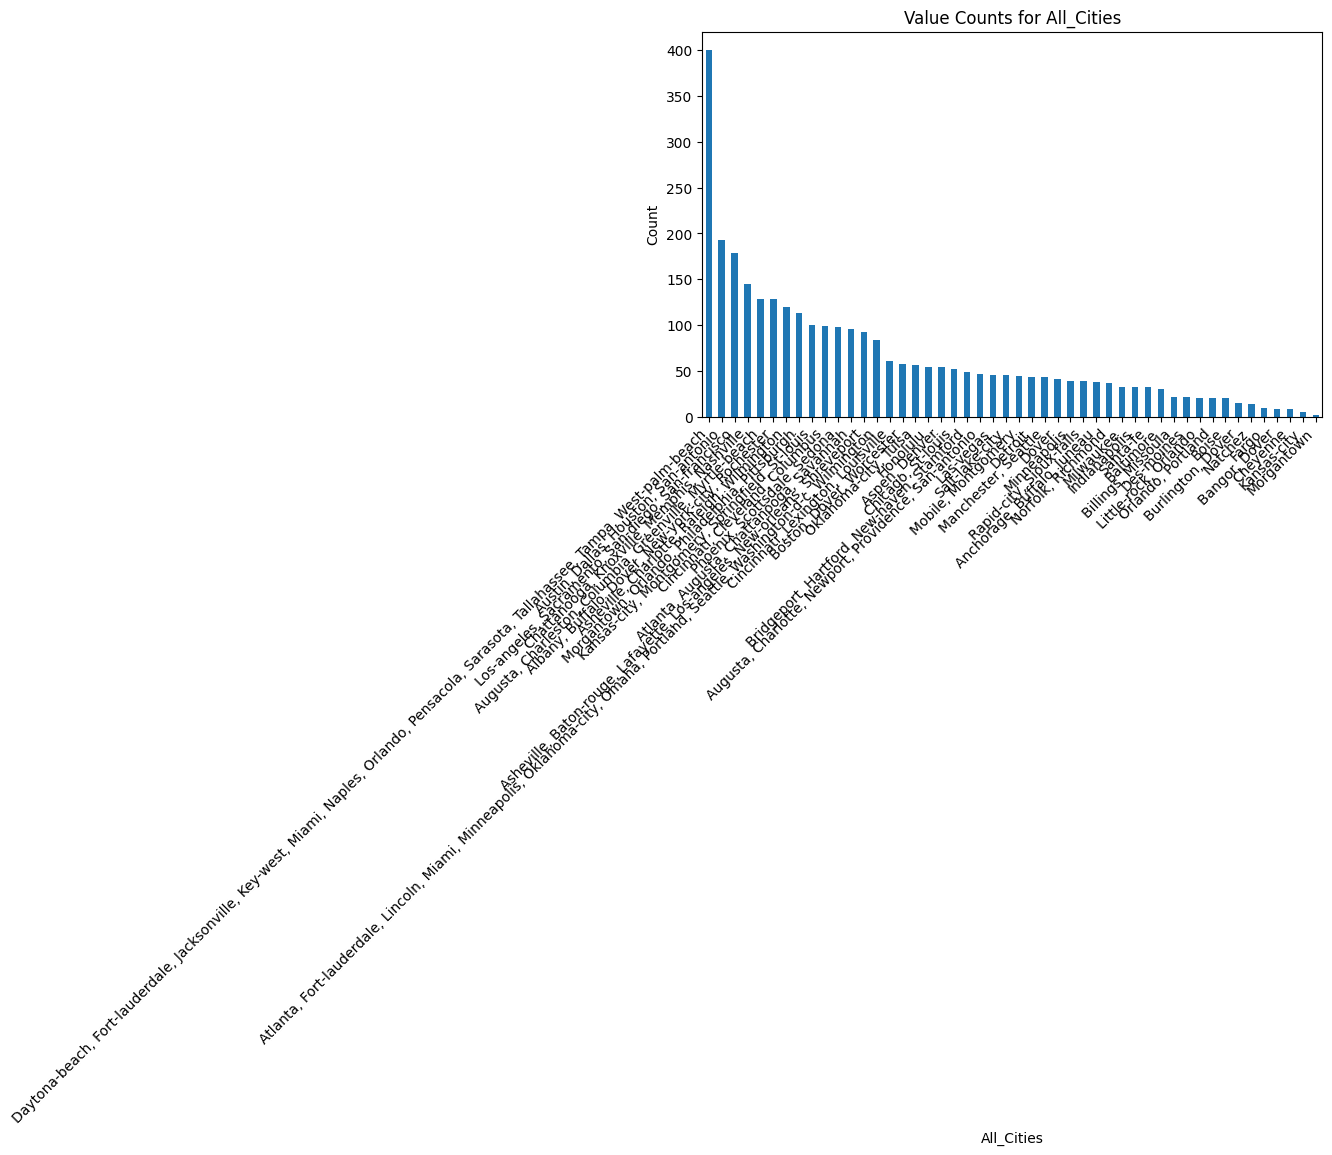

In [ ]:
# prompt: plot the statistical analysis for this dataset

# Assuming 'dataset' is already loaded and preprocessed as per the preceding code

# Generate descriptive statistics
descriptive_stats = dataset.describe()
print(descriptive_stats)

# Plot histograms for numerical columns
dataset.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Plot box plots for numerical columns to visualize distribution and outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=dataset)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = dataset.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# If you have categorical columns, you might want to plot value counts
for col in dataset.select_dtypes(include='object').columns:
  plt.figure(figsize=(8, 5))
  dataset[col].value_counts().plot(kind='bar')
  plt.title(f'Value Counts for {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

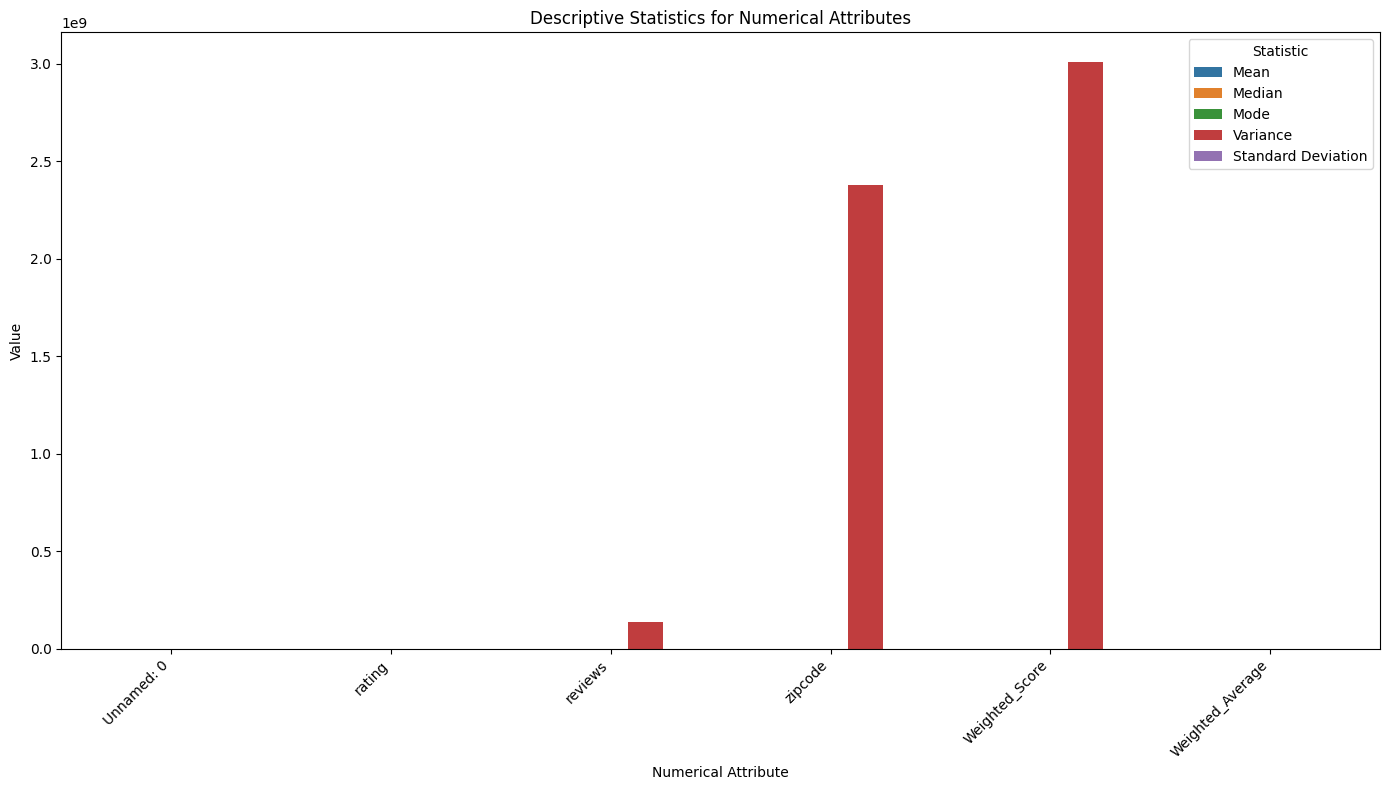

In [ ]:
# prompt: plot a single diagram for the mean, median, mode, variance, and standard deviation for numerical attributes

# Get numerical columns
numerical_cols = dataset.select_dtypes(include=np.number).columns

# Calculate statistics for each numerical column
stats_data = {}
for col in numerical_cols:
  stats_data[col] = {
      'Mean': dataset[col].mean(),
      'Median': dataset[col].median(),
      'Mode': dataset[col].mode()[0] if not dataset[col].mode().empty else np.nan, # Mode might return multiple values
      'Variance': dataset[col].var(),
      'Standard Deviation': dataset[col].std()
  }

stats_df = pd.DataFrame(stats_data).T # Transpose for easier plotting

# Plotting
plt.figure(figsize=(14, 8))

# Melt the DataFrame to long format for easier plotting with seaborn
stats_melted = stats_df.reset_index().melt(id_vars='index', var_name='Statistic', value_name='Value')

# Plotting the grouped bar chart
sns.barplot(x='index', y='Value', hue='Statistic', data=stats_melted)

plt.title('Descriptive Statistics for Numerical Attributes')
plt.xlabel('Numerical Attribute')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Statistic')
plt.tight_layout()
plt.show()

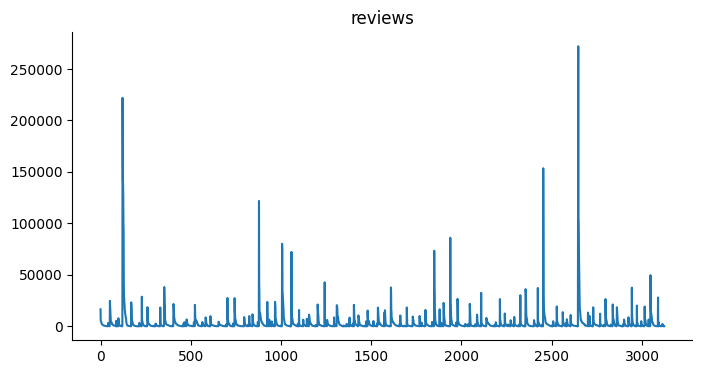

In [ ]:
# @title reviews

from matplotlib import pyplot as plt
dataset['reviews'].plot(kind='line', figsize=(8, 4), title='reviews')
plt.gca().spines[['top', 'right']].set_visible(False)

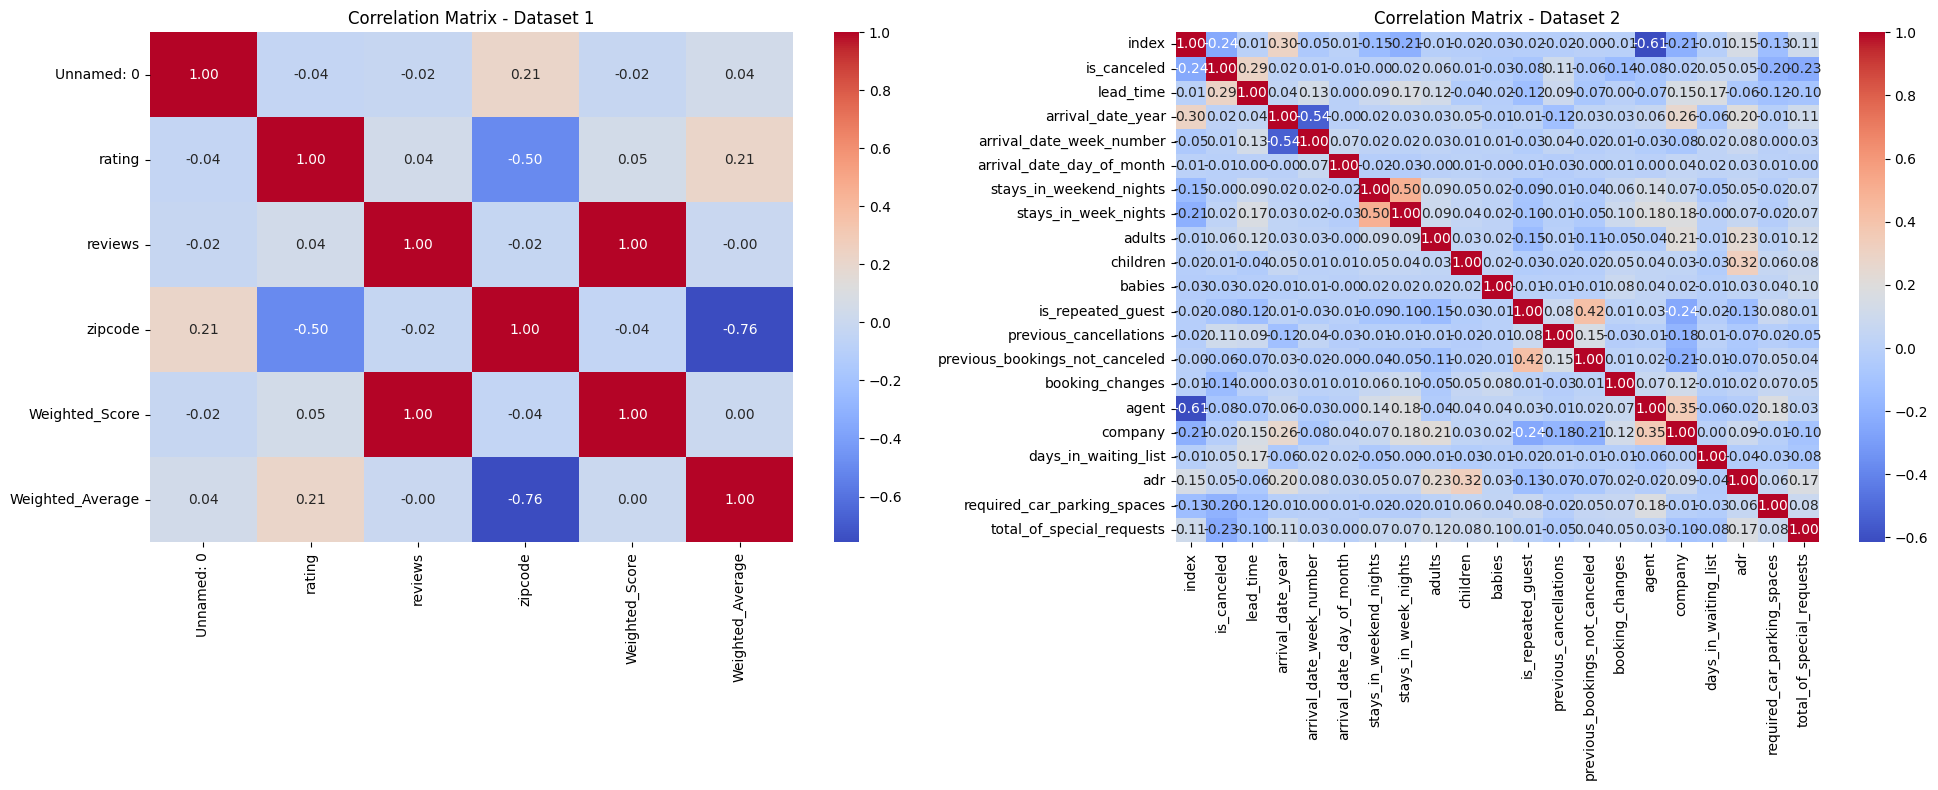

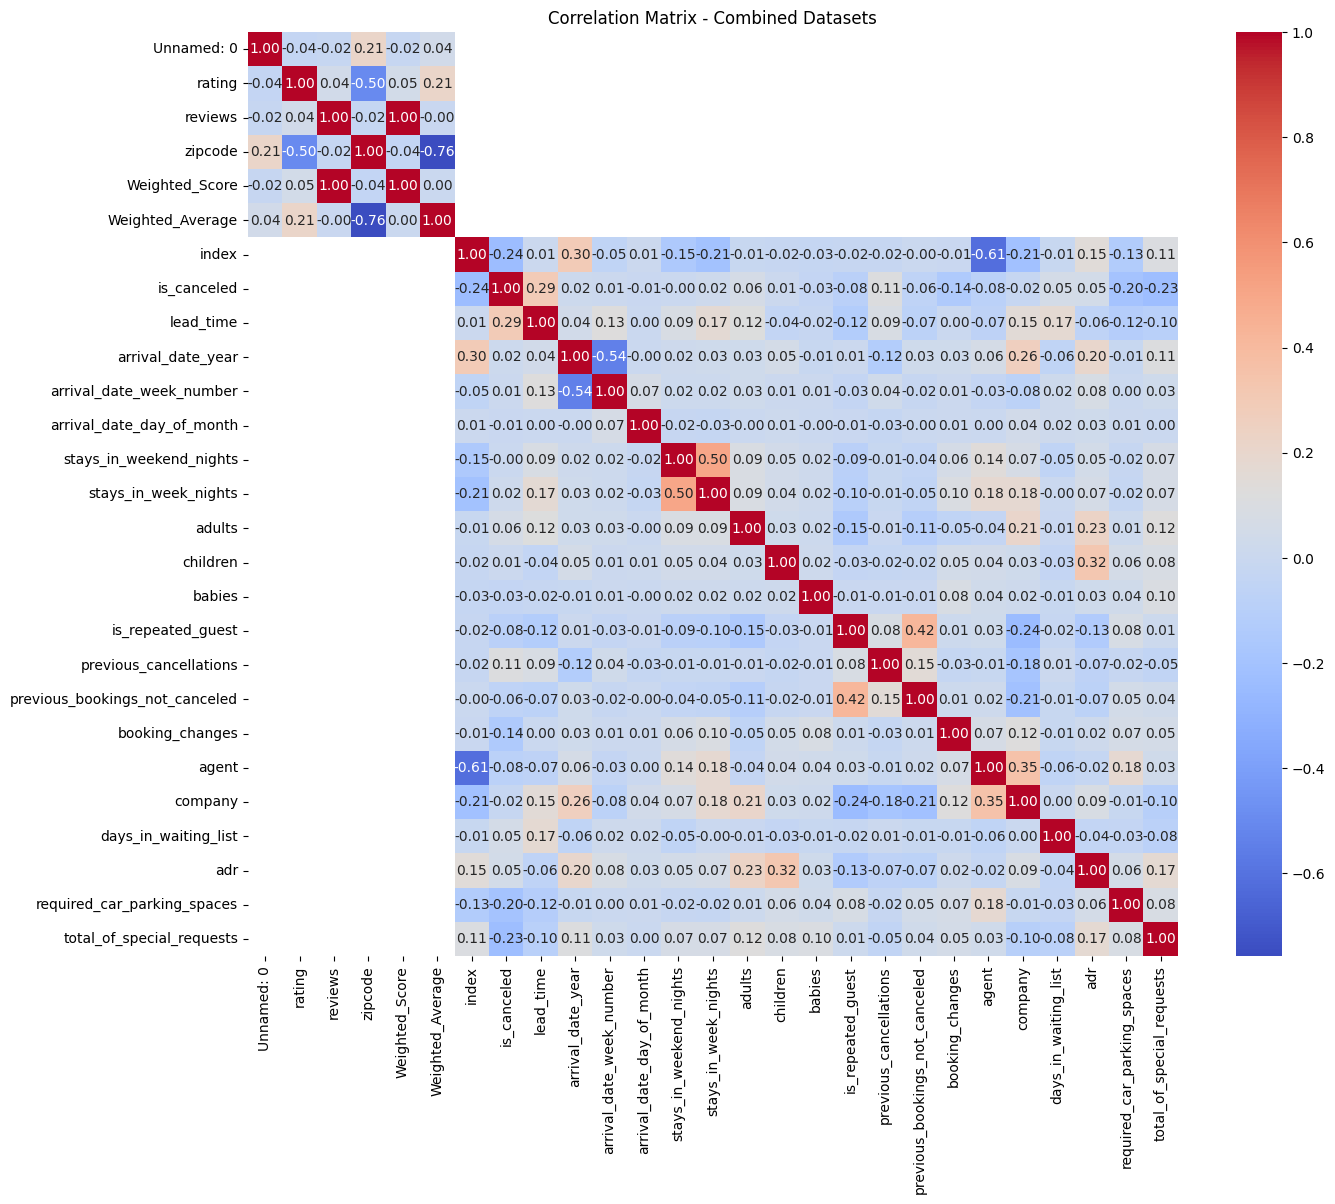

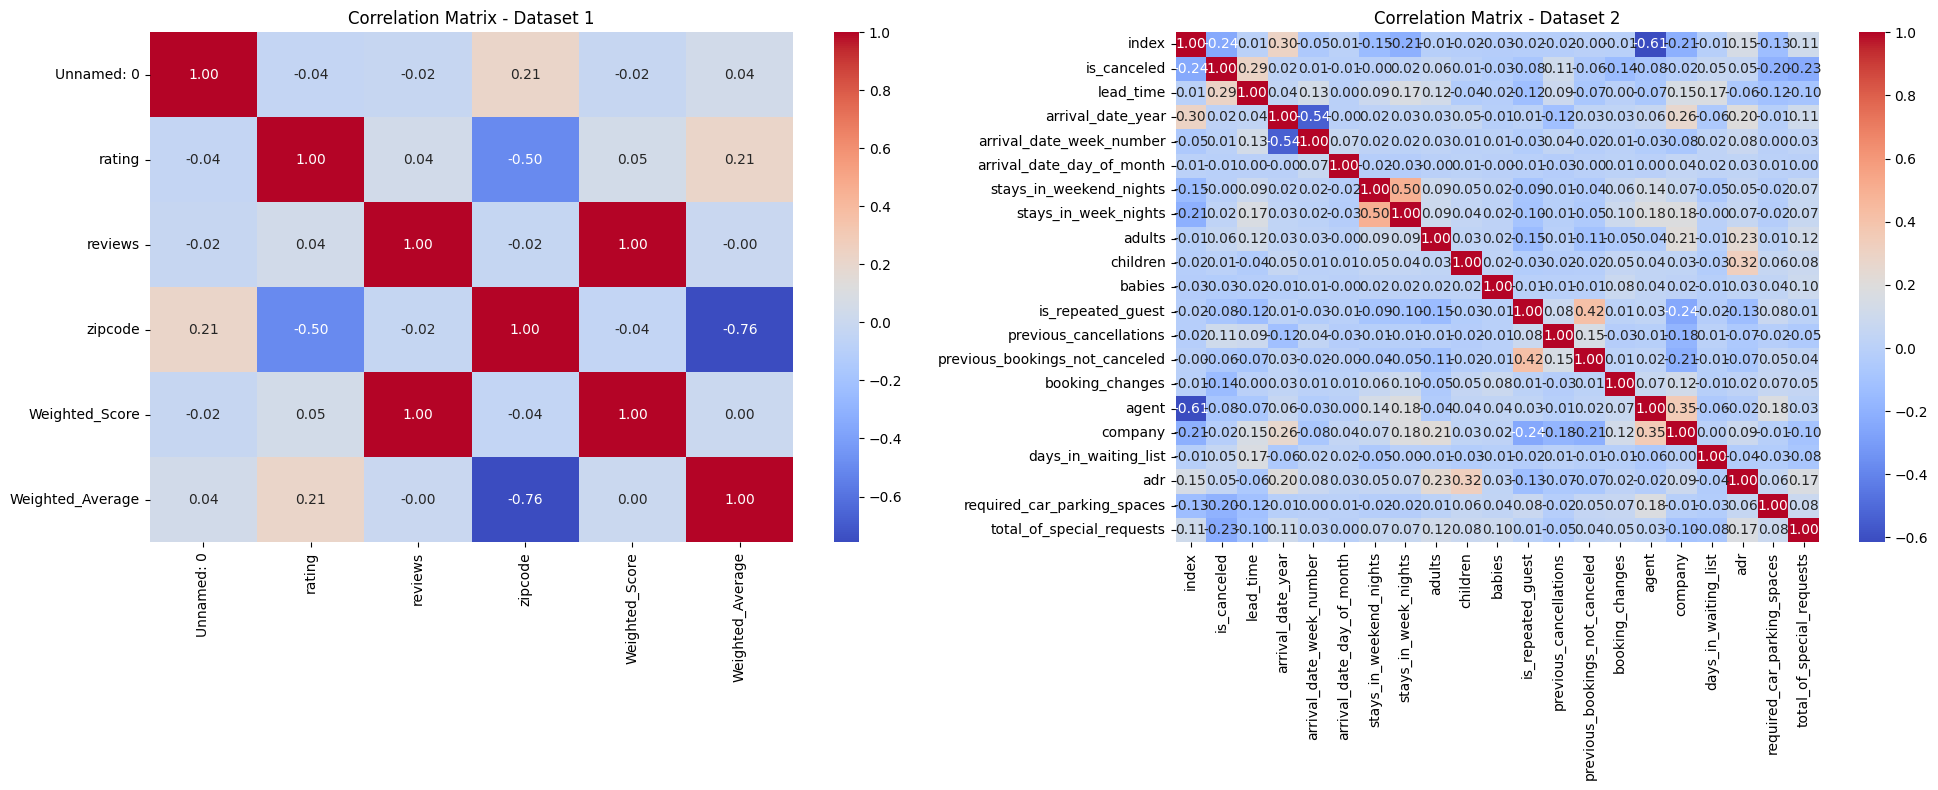

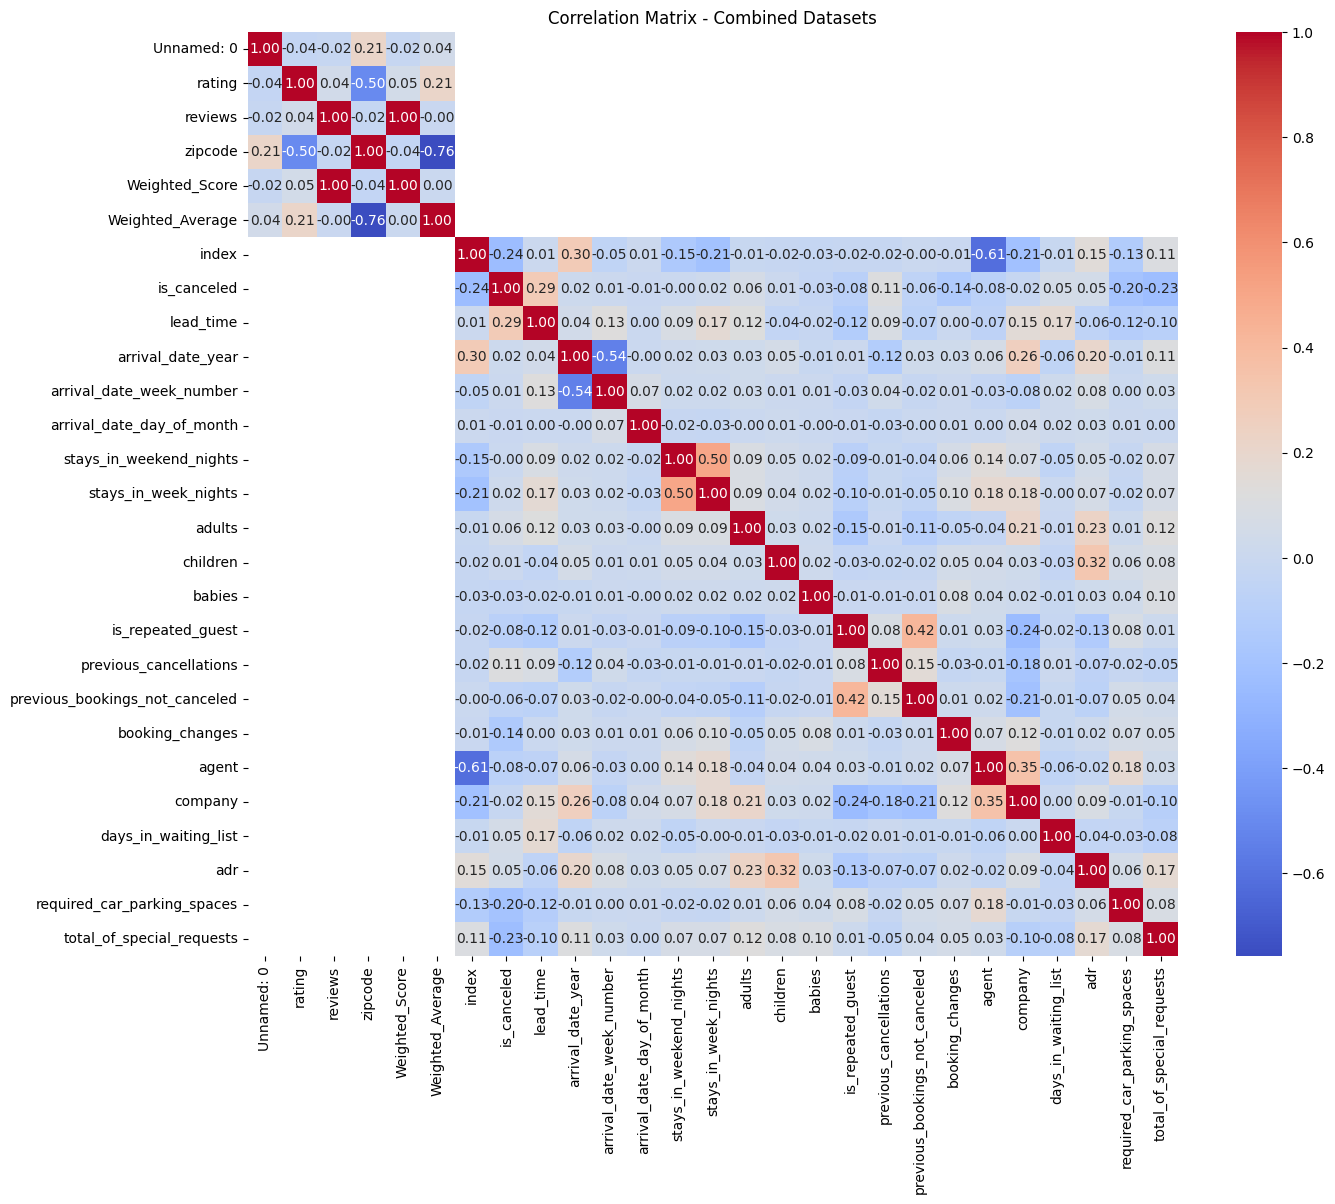

In [ ]:
# prompt: combine and plot the heat map of both dataset

# Assume `dataset` is your first dataset and `booking_dataset` is your second dataset, both loaded from previous steps.

# Select only numeric columns for heatmap
numeric_dataset = dataset.select_dtypes(include=np.number)
numeric_booking_dataset = booking_dataset.select_dtypes(include=np.number)

# Combine the two datasets. We'll concatenate them row-wise and calculate the correlation matrix for the combined data.
# Be mindful of potential differences in columns. You might need to align columns if necessary.
# For this example, we'll assume relevant numeric columns with the same name exist in both datasets or
# we are interested in the correlation across all numeric features present in either dataset.
# A simple concatenation might not be appropriate if the datasets represent different entities or timestamps.
# A better approach for showing heatmaps of two separate datasets might be to plot them side-by-side or plot their individual correlation matrices.

# Option 1: Plot individual heatmaps side-by-side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap for the first dataset
correlation_matrix_dataset = numeric_dataset.corr()
sns.heatmap(correlation_matrix_dataset, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title('Correlation Matrix - Dataset 1')

# Heatmap for the second dataset
correlation_matrix_booking = numeric_booking_dataset.corr()
sns.heatmap(correlation_matrix_booking, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title('Correlation Matrix - Dataset 2')

plt.tight_layout()
plt.show()

# Option 2: If you want to see the correlation across ALL numeric columns from BOTH datasets
# (This might result in a larger heatmap with many NaNs if columns don't overlap)
combined_numeric_data = pd.concat([numeric_dataset, numeric_booking_dataset], axis=0)
correlation_matrix_combined = combined_numeric_data.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_combined, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Combined Datasets')
plt.show()

# prompt: combine and plot the heat map of both dataset

# Assume `dataset` is your first dataset and `booking_dataset` is your second dataset, both loaded from previous steps.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Select only numeric columns for heatmap
numeric_dataset = dataset.select_dtypes(include=np.number)
numeric_booking_dataset = booking_dataset.select_dtypes(include=np.number)

# Combine the two datasets. We'll concatenate them row-wise and calculate the correlation matrix for the combined data.
# Be mindful of potential differences in columns. You might need to align columns if necessary.
# For this example, we'll assume relevant numeric columns with the same name exist in both datasets or
# we are interested in the correlation across all numeric features present in either dataset.
# A simple concatenation might not be appropriate if the datasets represent different entities or timestamps.
# A better approach for showing heatmaps of two separate datasets might be to plot them side-by-side or plot their individual correlation matrices.

# Option 1: Plot individual heatmaps side-by-side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap for the first dataset
correlation_matrix_dataset = numeric_dataset.corr()
sns.heatmap(correlation_matrix_dataset, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title('Correlation Matrix - Dataset 1')

# Heatmap for the second dataset
correlation_matrix_booking = numeric_booking_dataset.corr()
sns.heatmap(correlation_matrix_booking, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title('Correlation Matrix - Dataset 2')

plt.tight_layout()
plt.show()

# Option 2: If you want to see the correlation across ALL numeric columns from BOTH datasets
# (This might result in a larger heatmap with many NaNs if columns don't overlap)
combined_numeric_data = pd.concat([numeric_dataset, numeric_booking_dataset], axis=0)
correlation_matrix_combined = combined_numeric_data.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_combined, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Combined Datasets')
plt.show()

# Choose the option that best suits your visualization goal.
# Option 1 is generally better for comparing the correlation structures of two distinct datasets.

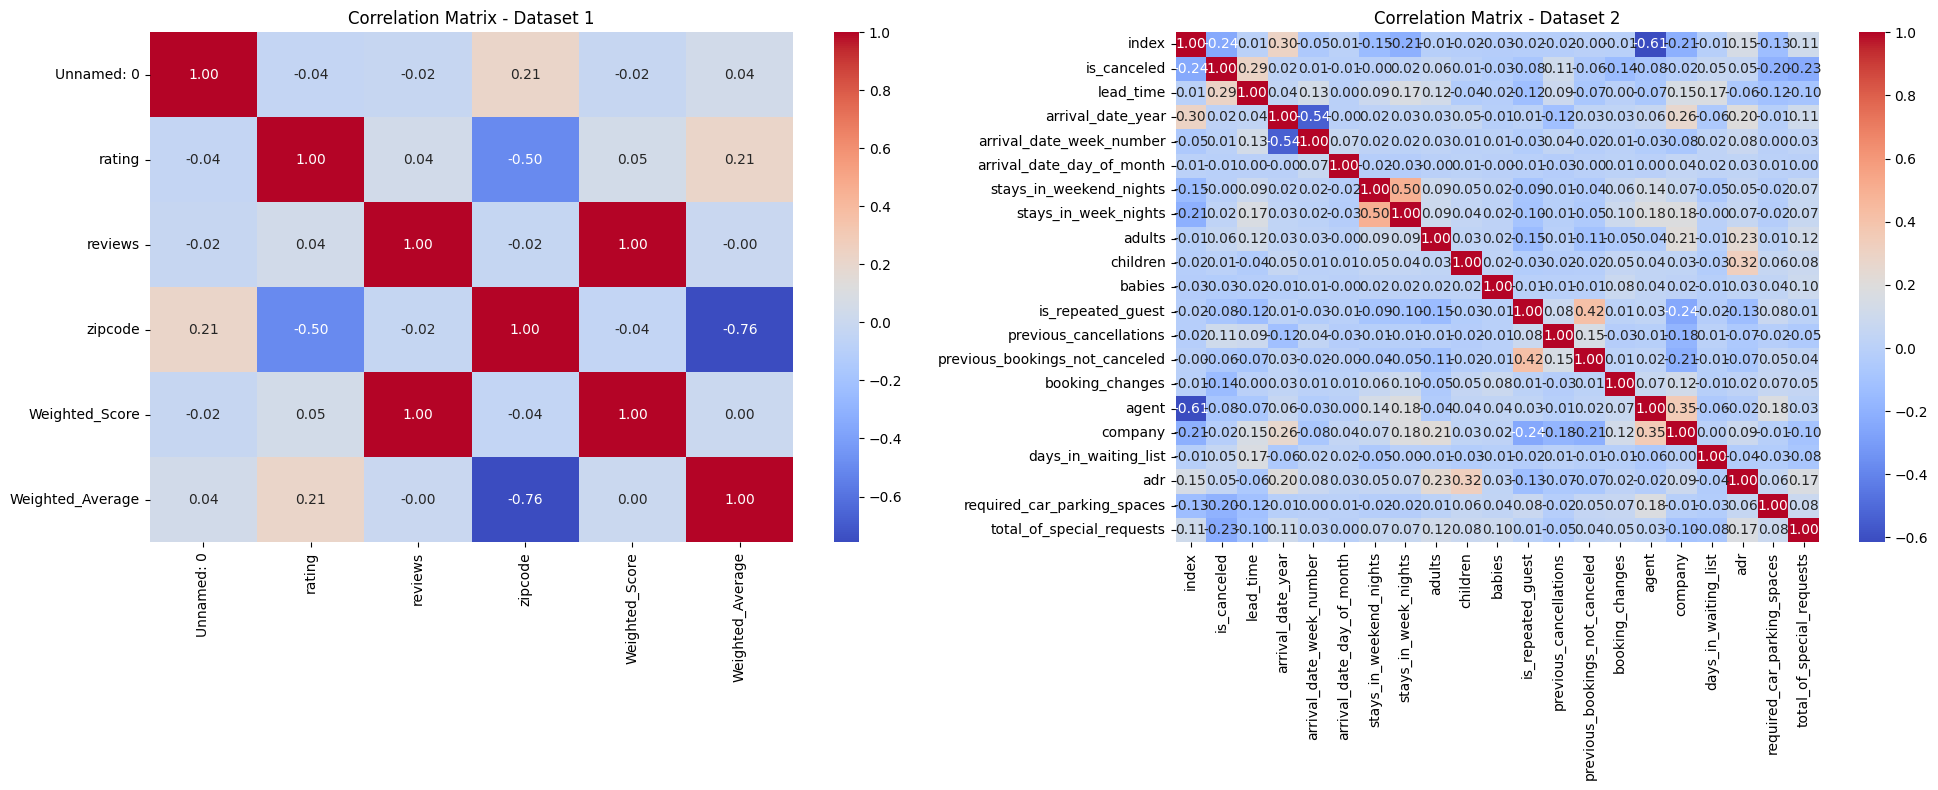

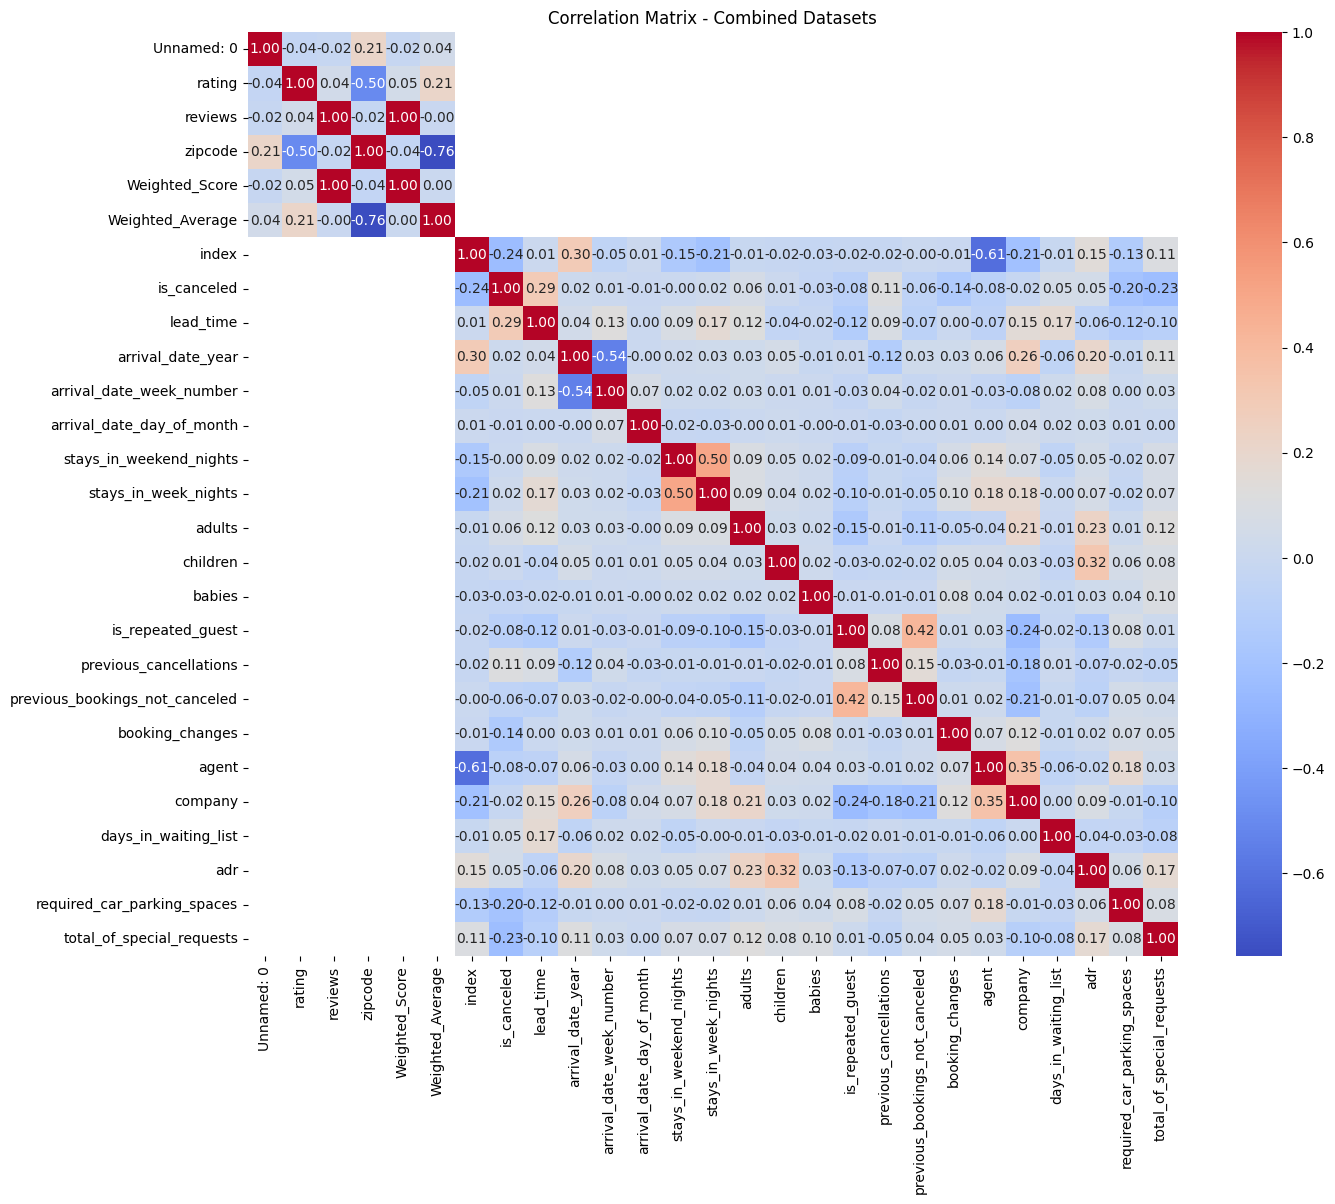

In [ ]:
# Assume `dataset` is your first dataset and `booking_dataset` is your second dataset, both loaded from previous steps.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the booking dataset (Ensure this cell is executed before using booking_dataset)
booking_dataset = pd.read_csv('hotel_bookings.csv')

# Select only numeric columns for heatmap
numeric_dataset = dataset.select_dtypes(include=np.number)
numeric_booking_dataset = booking_dataset.select_dtypes(include=np.number)

# Combine the two datasets. We'll concatenate them row-wise and calculate the correlation matrix for the combined data.
# Be mindful of potential differences in columns. You might need to align columns if necessary.
# For this example, we'll assume relevant numeric columns with the same name exist in both datasets or
# we are interested in the correlation across all numeric features present in either dataset.
# A simple concatenation might not be appropriate if the datasets represent different entities or timestamps.
# A better approach for showing heatmaps of two separate datasets might be to plot them side-by-side or plot their individual correlation matrices.

# Option 1: Plot individual heatmaps side-by-side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap for the first dataset
correlation_matrix_dataset = numeric_dataset.corr()
sns.heatmap(correlation_matrix_dataset, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title('Correlation Matrix - Dataset 1')

# Heatmap for the second dataset
correlation_matrix_booking = numeric_booking_dataset.corr()
sns.heatmap(correlation_matrix_booking, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title('Correlation Matrix - Dataset 2')

plt.tight_layout()
plt.show()

# Option 2: If you want to see the correlation across ALL numeric columns from BOTH datasets
# (This might result in a larger heatmap with many NaNs if columns don't overlap)
combined_numeric_data = pd.concat([numeric_dataset, numeric_booking_dataset], axis=0)
correlation_matrix_combined = combined_numeric_data.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_combined, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Combined Datasets')
plt.show()

In [ ]:
!pip install -q geopandas shapely folium plotly_express

In [ ]:
# Assume `dataset` is your first dataset and `booking_dataset` is your second dataset, both loaded from previous steps.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px # Import plotly.express for geospatial plots

# Load the booking dataset (Ensure this cell is executed before using booking_dataset)
# This line is already in the notebook, ensure it's run before this cell
# booking_dataset = pd.read_csv('hotel_bookings.csv')

# --- Start of Geospatial Plotting ---

# Let's analyze the distribution of data points by country in each dataset

# Count occurrences per country in the booking dataset
if 'country' in booking_dataset.columns:
    booking_country_counts = booking_dataset['country'].value_counts().reset_index()
    booking_country_counts.columns = ['country', 'number_of_bookings']

    # Create a choropleth map for the booking dataset
    print("Plotting distribution of bookings by Country:")
    fig_bookings = px.choropleth(booking_country_counts,
                                 locations="country", # Column with country codes
                                 color="number_of_bookings", # Column with value to color the map
                                 hover_name="country", # Show country name on hover
                                 color_continuous_scale=px.colors.sequential.Plasma,
                                 title="Number of Hotel Bookings by Country")
    fig_bookings.show()
else:
    print("Booking dataset does not have a 'country' column for geospatial plotting.")


# Count occurrences per country in your dataset (assuming it has a 'country' column)
if 'country' in dataset.columns:
    # Check if 'dataset' contains country codes or names.
    # If it contains names, you might need to map them to codes.
    # Assuming 'dataset' also uses country codes for simplicity.
    attraction_country_counts = dataset['country'].value_counts().reset_index()
    attraction_country_counts.columns = ['country', 'number_of_attractions']

    # Create a choropleth map for the dataset
    print("Plotting distribution of attractions by Country:")
    fig_attractions = px.choropleth(attraction_country_counts,
                                    locations="country", # Column with country codes
                                    color="number_of_attractions", # Column with value to color the map
                                    hover_name="country", # Show country name on hover
                                    color_continuous_scale=px.colors.sequential.Viridis,
                                    title="Number of Attractions by Country")
    fig_attractions.show()
else:
     # If 'country' is not available, let's try plotting by 'city' if it exists in 'dataset'
     if 'city' in dataset.columns:
        print("Dataset does not have a 'country' column. Attempting to plot by city (requires geocoding).")
        print("Note: Plotting by city requires geocoding, which is more complex.")
        # You would need to add code here to geocode cities and plot points on a map
        # Example using plotly with city names (requires internet connection and can be less precise):
        # city_counts = dataset['city'].value_counts().reset_index()
        # city_counts.columns = ['city', 'number_of_attractions']
        # fig_cities = px.scatter_geo(city_counts, locations="city", locationmode="country names", # or 'country names' if cities are within one country
        #                             size="number_of_attractions", hover_name="city",
        #                             title="Number of Attractions by City (approximate)")
        # fig_cities.show()
     else:
        print("Dataset does not have 'country' or 'city' columns for geospatial plotting.")


# --- End of Geospatial Plotting ---

# The heatmap code has been replaced by the geospatial plotting code.
# You can remove or comment out the original heatmap code below.
# ... (Original heatmap code is no longer needed for geospatial plots) ...
# Select only numeric columns for heatmap
# numeric_dataset = dataset.select_dtypes(include=np.number)
# numeric_booking_dataset = booking_dataset.select_dtypes(include=np.number)
# ... and so on for the rest of the heatmap code.

Plotting distribution of bookings by Country:


Plotting distribution of attractions by Country:


In [ ]:
# Getting information about the columns in each DataFrame
print(booking_dataset.info())
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   index                           119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

In [ ]:
# Check unique values in `hotel` and `name` columns
unique_hotels = booking_dataset['hotel'].unique()
unique_names = dataset['name'].unique()

# Check the number of unique values in each column
if len(unique_hotels) > 50:
    # If there are too many unique values, sample the top 50
    top_hotels = booking_dataset['hotel'].value_counts().head(50).index.tolist()
    print(f"Top 50 hotels: {top_hotels}")
else:
    # Otherwise, print all unique values
    print(f"All hotels: {unique_hotels}")

if len(unique_names) > 50:
    # If there are too many unique values, sample the top 50
    top_names = dataset['name'].value_counts().head(50).index.tolist()
    print(f"Top 50 names: {top_names}")
else:
    # Otherwise, print all unique values
    print(f"All names: {unique_names}")

All hotels: ['Resort Hotel' 'City Hotel']
Top 50 names: ['Freedom Park', 'Urban Air Trampoline and Adventure Park', "Ripley's Believe It or Not!", 'Riverfront Park', 'Washington Park', 'Riverside Park', 'Veterans Park', 'Waterfront Park', 'Taste It Tours', 'Midtown Park', 'Central Park', 'Liberty Park', 'Washington Square', 'Flyover', 'Butterfly Wonderland', 'Commons Park', 'Veterans Memorial Park', 'Paul Bunyan Statue', 'Marshall Park', 'Riverwalk', 'Washington Square Park', 'The Grotto', 'Papago Park', 'Medieval Torture Museum', 'Hollywood Wax Museum', 'Centennial Park', 'Stinson Park', 'Heard Museum', 'Shakespeare Garden', 'Memorial Park', 'Bird Key Park', 'Arizona Falls', 'Battery Park', 'The Battery', 'Arizona Boardwalk', 'Kosciuszko Park', 'Concord Park', 'McCormick-Stillman Railroad Park', 'Forest Park', 'Riverview Park', "Elvis Presley's Memphis", 'Phoenix Zoo', 'Broadway Pier', 'Tampa Riverwalk', 'Highland Park', 'Founders Park', 'Daytona Lagoon', 'Ponce de Leon Inlet Lighthou

In [ ]:
# Check if booking dataset contains tourist destination information
if 'destination' in booking_dataset.columns:
    print("The hotel dataset contains a 'destination' column.")
else:
    print("The hotel dataset does not contain a 'destination' column.")

# Check if booking dataset contains city information
if 'city' in booking_dataset.columns:
    print("The hotel dataset contains a 'city' column.")
else:
    print("The hotel dataset does not contain a 'city' column.")

# Check if tour location dataset contains city and name information
if 'city' in dataset.columns and 'name' in dataset.columns:
    print("The tourism dataset contains both 'city' and 'name' columns.")
else:
    print("The tourism dataset does not contain both 'city' and 'name' columns.")

# If booking dataset does not contain destination information, use df_tourism to map cities to attractions
if 'destination' not in booking_dataset.columns and 'city' in dataset.columns and 'name' in dataset.columns:
    # Create a mapping from cities to attractions
    city_attractions = dataset.groupby('city')['name'].apply(list).to_dict()

    # Print the mapping
    print("Mapping from cities to attractions:", city_attractions)
else:
    print("Cannot create a mapping from cities to attractions.")

The hotel dataset does not contain a 'destination' column.
The hotel dataset does not contain a 'city' column.
The tourism dataset contains both 'city' and 'name' columns.
Mapping from cities to attractions: {'Albany': ['New York State Museum', 'Washington Park', 'Far Shot Albany', 'New York State Capitol', 'Albany Pine Bush Preserve', 'USS SLATER', 'Albany Institute of History & Art', 'Six Mile Waterworks Park', "Huck Finn's Playland", 'Corning Preserve', 'Schuyler Mansion State Historic Site', 'Shaker Heritage Society', 'Tivoli Lake Preserve', 'Ridgefield Park', 'East Capitol Park', 'Crailo State Historic Site', 'Underground Railroad Education Center', 'Ten Broeck Mansion', 'Corning Tower Observation Deck', 'Irish American Heritage Museum', 'Buckingham Lake Park'], 'Anchorage': ['Alaska Zoo', 'Kincaid Park', 'Earthquake Park', 'Delaney Park', 'Anchorage Museum', 'Eagle River Nature Center', 'Cuddy Family Midtown Park', 'Bird Point', 'Alaska Aviation Museum', 'Indian Valley Mine & Gif

In [ ]:
import random

# Check if city_attractions is not empty and booking_dataset contains 'hotel' column
if city_attractions and 'hotel' in booking_dataset.columns:
    # Add a new column 'city' to booking_dataset and fill it with a randomly selected city for each row
    booking_dataset['city'] = [random.choice(list(city_attractions.keys())) for _ in range(len(booking_dataset))]

    # Add a new column 'potential_places' to booking dataset and fill it with a list of attractions based on the 'city' column
    booking_dataset['potential_places'] = booking_dataset['city'].apply(lambda city: city_attractions[city])

# Print the potential places
print(booking_dataset['potential_places'])

0         [Lummus Park, Zoo Miami, Vizcaya Museum & Gard...
1         [Urban Air Trampoline and Adventure Park, Aust...
2         [Daytona Beach Main Street Pier, Ponce de Leon...
3         [Chapel of the Holy Cross, Sedona Airport Scen...
4         [North Carolina Museum of Art, Pullen Park, La...
                                ...                        
119385    [Kennywood, Pittsburgh Zoo & Aquarium, Nationa...
119386    [PIER 39, Golden Gate Park, Union Square, Dolo...
119387    [National Naval Aviation Museum, Pensacola Bea...
119388    [Caras Park, Greenough Park, Splash Montana, B...
119389    [The Dallas World Aquarium, Dallas Zoo, Klyde ...
Name: potential_places, Length: 119390, dtype: object


In [ ]:
# Print the first 5 rows of booking dataset
print(booking_dataset.head().to_markdown(index=False, numalign="left", stralign="left"))

| index   | hotel        | is_canceled   | lead_time   | arrival_date_year   | arrival_date_month   | arrival_date_week_number   | arrival_date_day_of_month   | stays_in_weekend_nights   | stays_in_week_nights   | adults   | children   | babies   | meal   | country   | market_segment   | distribution_channel   | is_repeated_guest   | previous_cancellations   | previous_bookings_not_canceled   | reserved_room_type   | assigned_room_type   | booking_changes   | deposit_type   | agent   | company   | days_in_waiting_list   | customer_type   | adr   | required_car_parking_spaces   | total_of_special_requests   | reservation_status   | reservation_status_date   | city          | potential_places                                                                                                                                                                                                                                                                                                             

# **MODEL**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Check if there is a column with temporal/sequential data
if not any(col.endswith('__date') for col in booking_dataset.columns):
    # Create a new column `arrival_date` by joining `arrival_date_year`, `arrival_date_month`, and `arrival_date_day_of_month`
    booking_dataset['arrival_date'] = booking_dataset['arrival_date_year'].astype(str) + '-' + booking_dataset['arrival_date_month'] + '-' + booking_dataset['arrival_date_day_of_month'].astype(str)
    booking_dataset['arrival_date'] = pd.to_datetime(booking_dataset['arrival_date'])


# Sort the DataFrame by `arrival_date`
booking = booking_dataset.sort_values(by='arrival_date')

print((booking.head(5)).to_markdown(index=False, numalign="left", stralign="left"))


| index   | hotel        | is_canceled   | lead_time   | arrival_date_year   | arrival_date_month   | arrival_date_week_number   | arrival_date_day_of_month   | stays_in_weekend_nights   | stays_in_week_nights   | adults   | children   | babies   | meal   | country   | market_segment   | distribution_channel   | is_repeated_guest   | previous_cancellations   | previous_bookings_not_canceled   | reserved_room_type   | assigned_room_type   | booking_changes   | deposit_type   | agent   | company   | days_in_waiting_list   | customer_type   | adr   | required_car_parking_spaces   | total_of_special_requests   | reservation_status   | reservation_status_date   | city       | potential_places                                                                                                                                                                                                                                                                                                                

In [ ]:
# Select the relevant columns
selected_columns = ['hotel', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
                   'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest',
                   'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type',
                   'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type',
                   'required_car_parking_spaces', 'total_of_special_requests', 'city', 'potential_places']

# Convert categorical features to numerical using one-hot encoding
categorical_columns = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel',
                       'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type',
                       'city']



In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(booking[categorical_columns])

In [ ]:
# Scale numerical features
numerical_columns = ['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                    'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
                    'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(booking[numerical_columns])

In [ ]:
# Combine encoded and scaled features
features = np.concatenate([encoded_features, scaled_features], axis=1)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(features, booking['hotel'], test_size=0.2, random_state=42)

# Reshape the input data to be [samples, time steps, features]
# Here, we assume each sequence has length 1
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
X_train.shape
X_test.shape

(23878, 1, 356)

In [ ]:
# Convert Y_train to numerical data type
Y_train = pd.get_dummies(Y_train, drop_first=True)  # One-hot encoding for 'hotel' column
# Assuming 'hotel' has two unique values, otherwise adjust drop_first or use other encoding methods

# Convert the one-hot encoded DataFrame to a NumPy array
Y_train = Y_train.to_numpy()

# Ensure Y_train is of type float32
Y_train = Y_train.astype(np.float32)


# Do the same for Y_test
Y_test = pd.get_dummies(Y_test, drop_first=True)
Y_test = Y_test.to_numpy()
Y_test = Y_test.astype(np.float32)

In [ ]:
!pip install keras-self-attention

  Preparing metadata (setup.py) ... done
  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18895 sha256=bdb37bd0cbe37948b58b6a187d1d6fefed3c56884452336f29d4cb06d200df01
  Stored in directory: /root/.cache/pip/wheels/46/f9/96/709295c836133071c12a300729fed4027757f889c01695feea
Successfully built keras-self-attention


### TESTING FOR DATA LEAKAGE

In [ ]:
print(f"Total samples: {len(booking)}")
print(f"Train samples: {len(Y_train)}")
print(f"Test samples: {len(Y_test)}")

Total samples: 119390
Train samples: 95512
Test samples: 23878


In [ ]:
# Select numerical features for linear regression
numerical_features = ['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                    'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
                    'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']

# Ensure 'hotel' is not in your feature lists
categorical_columns = [col for col in booking.columns if booking[col].dtype == 'object' or booking[col].dtype == 'category']
categorical_columns = [col for col in categorical_columns if col != 'hotel']
numerical_features = [col for col in numerical_features if col != 'hotel']


# Select all features, including 'linear_prediction'
all_features = numerical_features + categorical_columns + ['linear_prediction']
all_features = [col for col in all_features if col != 'hotel']

print("Features being used:")
print("Categorical:", categorical_columns)
print("Numerical:", numerical_features)
print("All features:", all_features)
print("Target variable:", 'hotel')

Features being used:
Categorical: ['arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date', 'city', 'potential_places']
Numerical: ['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']
All features: ['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date', 

In [ ]:
# Encode the target (hotel column)
target_encoded = booking['hotel'].astype('category').cat.codes

for col in booking.columns:
    try:
        # Skip columns that can't be processed (e.g., lists, dicts)
        if booking[col].nunique() == 2:
            col_encoded = booking[col].astype('category').cat.codes
            if (col_encoded == target_encoded).all():
                print(f"Perfect match with target: {col}")
    except (TypeError, AttributeError):
        # Skip problematic columns (like lists, dicts, or mixed types)
        continue

Perfect match with target: hotel


Result shows data leakage

# LINEAR REGRESSION AND DEEP LEARNING MODEL



## Linear regression model



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Select the numerical features from the booking DataFrame.
numerical_features = ['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                    'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
                    'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']

# Select the target variable and convert it to numerical values.
target = booking['hotel'].replace({'City Hotel': 0, 'Resort Hotel': 1})

# Handle missing values in numerical features
imputer = SimpleImputer(strategy='mean')
numerical_features_imputed = imputer.fit_transform(booking[numerical_features])

# Create an instance of the LinearRegression model.
linear_model_independent = LinearRegression()

# Train the linear regression model.
linear_model_independent.fit(numerical_features_imputed, target)

/tmp/ipython-input-34-3145550013.py:10: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



LinearRegression()

## Deep learning model



In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout, concatenate
from tensorflow.keras.models import Model

# Input for numerical features (excluding 'linear_prediction')
numerical_input_dl = Input(shape=(len(numerical_features),), name='numerical_input_dl')

# Input for categorical features (after one-hot encoding)
categorical_input_dl = Input(shape=(encoded_features.shape[1],), name='categorical_input_dl')

# Concatenate the numerical and categorical inputs
concatenated_inputs = concatenate([numerical_input_dl, categorical_input_dl])

# Add Dense layers with ReLU activation and Dropout for regularization
x = Dense(128, activation='relu')(concatenated_inputs)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)

# Output layer with sigmoid activation for binary classification
output_dl = Dense(1, activation='sigmoid', name='output_dl')(x)

# Create the deep learning model
deep_learning_model = Model(inputs=[numerical_input_dl, categorical_input_dl], outputs=output_dl)

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from tensorflow.keras.layers import Input, Dense, Dropout, concatenate
from tensorflow.keras.models import Model

# Re-define numerical and categorical columns to exclude 'linear_prediction' and 'potential_places'
numerical_columns = ['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                    'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
                    'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']

categorical_columns = [col for col in booking.columns if booking[col].dtype == 'object' or booking[col].dtype == 'category']
categorical_columns = [col for col in categorical_columns if col not in ['hotel', 'potential_places', 'reservation_status', 'reservation_status_date']] # Exclude target and problematic columns

# Impute missing values in numerical features before encoding and scaling
imputer = SimpleImputer(strategy='mean')
booking[numerical_columns] = imputer.fit_transform(booking[numerical_columns])

# One-hot encode categorical features based on the selected categorical_columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features_dl = encoder.fit_transform(booking[categorical_columns])

# Scale numerical features
scaler = MinMaxScaler()
scaled_numerical_features_dl = scaler.fit_transform(booking[numerical_columns])

# Combine encoded and scaled features for the deep learning model
features_dl = np.concatenate([scaled_numerical_features_dl, encoded_features_dl], axis=1)

# Encode the target variable
target_encoded_dl = booking['hotel'].replace({'City Hotel': 0, 'Resort Hotel': 1})

# Split data into training and testing sets for the deep learning model
X_train_dl_num, X_test_dl_num, X_train_dl_cat, X_test_dl_cat, Y_train_dl, Y_test_dl = train_test_split(
    scaled_numerical_features_dl,  # Numerical features
    encoded_features_dl,  # Categorical (encoded) features
    target_encoded_dl,   # Target
    stratify=target_encoded_dl, test_size=0.2, random_state=42
)

# Determine class weights for the target variable
class_counts_dl = booking['hotel'].value_counts()
if abs(class_counts_dl.iloc[0] - class_counts_dl.iloc[1]) > 0.2 * len(booking):  # If imbalance >20%
    ratio_dl = class_counts_dl.iloc[0] / class_counts_dl.iloc[1]
    class_weights_dl = {0: 1, 1: ratio_dl}
else:
    class_weights_dl = {0: 1, 1: 1}  # Balanced weights

# Define the deep learning model architecture again with correct input shapes
numerical_input_dl = Input(shape=(scaled_numerical_features_dl.shape[1],), name='numerical_input_dl')
categorical_input_dl = Input(shape=(encoded_features_dl.shape[1],), name='categorical_input_dl')

concatenated_inputs = concatenate([numerical_input_dl, categorical_input_dl])

x = Dense(128, activation='relu')(concatenated_inputs)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)

output_dl = Dense(1, activation='sigmoid', name='output_dl')(x)

deep_learning_model = Model(inputs=[numerical_input_dl, categorical_input_dl], outputs=output_dl)


# Compile the deep learning model
deep_learning_model.compile(loss='binary_crossentropy',
                            optimizer='adam',
                            metrics=['accuracy',
                                     tf.keras.metrics.Precision(),
                                     tf.keras.metrics.Recall()])

# Train the deep learning model
history_dl = deep_learning_model.fit(
    [X_train_dl_num, X_train_dl_cat],
    Y_train_dl,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights_dl # if imbalanced
)

/tmp/ipython-input-33-2684446017.py:33: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Epoch 1/5
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7584 - loss: 0.6323 - precision: 0.6154 - recall: 0.7778 - val_accuracy: 0.8256 - val_loss: 0.3592 - val_precision: 0.6920 - val_recall: 0.8715
Epoch 2/5
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8278 - loss: 0.4826 - precision: 0.7004 - recall: 0.8464 - val_accuracy: 0.8223 - val_loss: 0.3647 - val_precision: 0.6801 - val_recall: 0.8946
Epoch 3/5
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.8342 - loss: 0.4600 - precision: 0.7042 - recall: 0.8589 - val_accuracy: 0.8416 - val_loss: 0.3311 - val_precision: 0.7244 - val_recall: 0.8571
Epoch 4/5
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8380 - loss: 0.4487 - precision: 0.7139 - recall: 0.8591 - val_accuracy: 0.8410 - val_loss: 0.3213 - val_precision: 0.7177 - val_recall: 0.8721
Epoch 5/5
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8449 - loss: 0.4317 - precision: 0.7218 - recall: 0.8730 - val_accuracy: 0.8383 - va

## Evaluate Linear Regression Model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score
from sklearn.impute import SimpleImputer

# Select the numerical features from the booking DataFrame.
numerical_features = ['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                    'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
                    'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']

# Select the target variable and convert it to numerical values.
target = booking['hotel'].replace({'City Hotel': 0, 'Resort Hotel': 1})

# Handle missing values in numerical features for the entire dataset
imputer = SimpleImputer(strategy='mean')
numerical_features_imputed = imputer.fit_transform(booking[numerical_features])

# Split the data into training and testing sets for consistent evaluation
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    numerical_features_imputed,
    target,
    test_size=0.2,
    random_state=42,
    stratify=target # Stratify to maintain the proportion of target classes
)

# Train the linear regression model on the training data
linear_model_independent.fit(X_train_lr, y_train_lr)

# Make predictions on the test set
y_pred_lr = linear_model_independent.predict(X_test_lr)

# Evaluate the linear regression model
mse_lr = mean_squared_error(y_test_lr, y_pred_lr)
r2_lr = r2_score(y_test_lr, y_pred_lr)

# to interpret as binary classification (e.g., for comparison with the deep learning model)
# You can set a threshold (e.g., 0.5) to convert continuous predictions to binary
y_pred_lr_binary = (y_pred_lr > 0.5).astype(int)

accuracy_lr = accuracy_score(y_test_lr, y_pred_lr_binary)
precision_lr = precision_score(y_test_lr, y_pred_lr_binary)
recall_lr = recall_score(y_test_lr, y_pred_lr_binary)
F1_score_lr = 2 * (precision_lr * recall_lr) / (precision_lr + recall_lr)

print(f'\nLinear Regression Model (Binary Interpretation):')
print(f'Accuracy: {accuracy_lr:.4f}')
print(f'Precision: {precision_lr:.4f}')
print(f'Recall: {recall_lr:.4f}')
print(f'F1 Score: {F1_score_lr:.4f}')

/tmp/ipython-input-35-450253442.py:10: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`




Linear Regression Model (Binary Interpretation):
Accuracy: 0.7195
Precision: 0.7398
Recall: 0.2530
F1 Score: 0.3770


## Evaluate Deep Learning Model

In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the test data for the deep learning model
y_pred_probs_dl = deep_learning_model.predict([X_test_dl_num, X_test_dl_cat])

# Convert probabilities to class labels (0 or 1)
y_pred_classes_dl = (y_pred_probs_dl > 0.5).astype(int).flatten()

# Evaluate the deep learning model using classification report
print('Deep Learning Model Evaluation:')
print(classification_report(Y_test_dl, y_pred_classes_dl))

NameError: name 'deep_learning_model' is not defined

# HYBRID MODEl

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input, concatenate, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers # Import regularizers
from keras.layers import Conv1D, Dropout
from keras_self_attention import SeqSelfAttention
from sklearn.impute import SimpleImputer # Import SimpleImputer

# ... (your previous code for data loading and preprocessing) ...

# 1. Train Linear Regression Model for Feature Engineering:
# Select numerical features for linear regression
numerical_features = ['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                    'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
                    'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']

# Ensure 'hotel' is not in your feature lists and exclude 'potential_places'
categorical_columns = [col for col in booking.columns if booking[col].dtype == 'object' or booking[col].dtype == 'category']
categorical_columns = [col for col in categorical_columns if col != 'hotel' and col != 'potential_places']
numerical_features = [col for col in numerical_features if col != 'hotel']

# Create and train the linear regression model
linear_model = LinearRegression()

# Impute missing values in numerical features before fitting the model
imputer = SimpleImputer(strategy='mean')  # Replace NaN with the mean of the column
booking[numerical_features] = imputer.fit_transform(booking[numerical_features])

linear_model.fit(booking[numerical_features], booking['hotel'].replace({'City Hotel': 0, 'Resort Hotel': 1}))  # Assuming 'hotel' is your target

# 2. Generate New Feature using Linear Regression Predictions:
# Predict on the entire dataset to create a new feature
booking['linear_prediction'] = linear_model.predict(booking[numerical_features])

# 3. Prepare Data for Deep Learning Model (including the new feature):
# Select all features, including 'linear_prediction' and excluding 'potential_places'
all_features = numerical_features + categorical_columns + ['linear_prediction']
all_features = [col for col in all_features if col != 'hotel']

# ... (your code for one-hot encoding and scaling, using 'all_features') ...
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # Create a OneHotEncoder object

# Select only categorical features from 'all_features'
categorical_features = [col for col in all_features if col in categorical_columns]

# Fit and transform the encoder on the categorical features
encoded_features = encoder.fit_transform(booking[categorical_features])


# ----> Perform scaling for numerical features in 'all_features' <----
scaler = MinMaxScaler() # Create a MinMaxScaler object

# Select only numerical features from 'all_features' (including 'linear_prediction')
numerical_features_to_scale = [col for col in all_features if col in numerical_features + ['linear_prediction']]

# Fit and transform the scaler on the numerical features
scaled_numerical_features = scaler.fit_transform(booking[numerical_features_to_scale])

# Combine encoded and scaled features
scaled_features_with_linear_pred = np.concatenate([scaled_numerical_features, encoded_features], axis=1)

# 4. Build the Hybrid Model:
# Input for numerical and linear prediction features
numerical_input = Input(shape=(len(numerical_features) + 1,))  # +1 for 'linear_prediction'

# Input for categorical features (after one-hot encoding)
categorical_input = Input(shape=(encoded_features.shape[1],))

# Select numerical features for linear regression
numerical_features = ['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                    'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
                    'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']

# Create and train the linear regression model
linear_model = LinearRegression()

# Impute missing values in numerical features before fitting the model
imputer = SimpleImputer(strategy='mean')  # Replace NaN with the mean of the column
booking[numerical_features] = imputer.fit_transform(booking[numerical_features])

linear_model.fit(booking[numerical_features], booking['hotel'].replace({'City Hotel': 0, 'Resort Hotel': 1}))  # Assuming 'hotel' is your target

# 2. Generate New Feature using Linear Regression Predictions:
# Predict on the entire dataset to create a new feature
booking['linear_prediction'] = linear_model.predict(booking[numerical_features])

# 3. Prepare Data for Deep Learning Model (including the new feature):
# Select all features, including 'linear_prediction'
all_features = numerical_features + categorical_columns + ['linear_prediction']

# ... (your code for one-hot encoding and scaling, using 'all_features') ...
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # Create a OneHotEncoder object

# Select only categorical features from 'all_features'
categorical_features = [col for col in all_features if col in categorical_columns]

# Fit and transform the encoder on the categorical features
encoded_features = encoder.fit_transform(booking[categorical_features])


# ----> Perform scaling for numerical features in 'all_features' <----
scaler = MinMaxScaler() # Create a MinMaxScaler object

# Select only numerical features from 'all_features' (including 'linear_prediction')
numerical_features_to_scale = [col for col in all_features if col in numerical_features + ['linear_prediction']]

# Fit and transform the scaler on the numerical features
scaled_numerical_features = scaler.fit_transform(booking[numerical_features_to_scale])

# Combine encoded and scaled features
scaled_features_with_linear_pred = np.concatenate([scaled_numerical_features, encoded_features], axis=1)

# 4. Build the Hybrid Model:
# Input for numerical and linear prediction features
numerical_input = Input(shape=(len(numerical_features) + 1,))  # +1 for 'linear_prediction'

# Input for categorical features (after one-hot encoding)
categorical_input = Input(shape=(encoded_features.shape[1],))

<ipython-input-34-ad5860af7932>:34: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-34-ad5860af7932>:86: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
import tensorflow as tf

# Deep learning part (CNN + LSTM + Self-Attention)
x = concatenate([numerical_input, categorical_input])
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

hybrid1_model = Model(inputs=[numerical_input, categorical_input], outputs=output)
# Create the hybrid model
hybrid1_model = Model(inputs=[numerical_input, categorical_input], outputs=output)

# 5. Compile and Train the Hybrid Model:
hybrid1_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Split data into training and testing sets
X_train_num, X_test_num, X_train_cat, X_test_cat, Y_train, Y_test = train_test_split(
    scaled_features_with_linear_pred[:, :len(numerical_features) + 1],  # Numerical and linear prediction
    scaled_features_with_linear_pred[:, len(numerical_features) + 1:],  # Categorical (encoded)
    booking['hotel'].replace({'City Hotel': 0, 'Resort Hotel': 1}),   # Target
    stratify=booking['hotel'], test_size=0.2, random_state=42
)

# ... (Reshape X_train_num, X_test_num for LSTM if necessary) ...

hybrid1_model.fit([X_train_num, X_train_cat], Y_train, epochs=1, batch_size=30, validation_split=0.2)

# ... (Evaluate the hybrid model) ...

# Create the hybrid model
hybrid1_model = Model(inputs=[numerical_input, categorical_input], outputs=output)

# 5. Compile and Train the Hybrid Model:hybrid_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hybrid1_model.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy',
                            tf.keras.metrics.Precision(),
                            tf.keras.metrics.Recall()])

# Split data into training and testing sets
X_train_num, X_test_num, X_train_cat, X_test_cat, Y_train, Y_test = train_test_split(
    scaled_features_with_linear_pred[:, :len(numerical_features) + 1],  # Numerical and linear prediction
    scaled_features_with_linear_pred[:, len(numerical_features) + 1:],  # Categorical (encoded)
    booking['hotel'].replace({'City Hotel': 0, 'Resort Hotel': 1}),   # Target
    stratify=booking['hotel'], test_size=0.2, random_state=42
)

# ... (Reshape X_train_num, X_test_num for LSTM if necessary) ...
class_counts = booking['hotel'].value_counts()
if abs(class_counts[0] - class_counts[1]) > 0.2 * len(booking):  # If imbalance >20%
    ratio = class_counts[0] / class_counts[1]
    class_weights = {0: 1, 1: ratio}
else:
    class_weights = {0: 1, 1: 1}  # Balanced weights

2547/2547 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7974 - loss: 0.4198 - val_accuracy: 0.8599 - val_loss: 0.3017


<ipython-input-35-aa776ddf995e>:45: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
history = hybrid1_model.fit(
    [X_train_num, X_train_cat],
    Y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights  # if imbalanced
)

Epoch 1/5
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.8655 - loss: 0.3812 - precision: 0.7595 - recall: 0.8832 - val_accuracy: 0.8678 - val_loss: 0.2845 - val_precision: 0.7716 - val_recall: 0.8645
Epoch 2/5
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 39s 9ms/step - accuracy: 0.8737 - loss: 0.3575 - precision: 0.7691 - recall: 0.8938 - val_accuracy: 0.8725 - val_loss: 0.2825 - val_precision: 0.7907 - val_recall: 0.8464
Epoch 3/5
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8837 - loss: 0.3319 - precision: 0.7834 - recall: 0.8984 - val_accuracy: 0.8697 - val_loss: 0.2845 - val_precision: 0.7766 - val_recall: 0.8620
Epoch 4/5
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8940 - loss: 0.3101 - precision: 0.8015 - recall: 0.9089 - val_accuracy: 0.8711 - val_loss: 0.2872 - val_precision: 0.7764 - val_recall: 0.8682
Epoch 5/5
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.9001 - loss: 0.2934 - precision: 0.8105 - recall: 0.9145 - val_accuracy: 0.8706 - v

In [ ]:
from sklearn.metrics import classification_report

y_pred = (hybrid1_model.predict([X_test_num, X_test_cat]) > 0.5).astype(int)
print(classification_report(Y_test, y_pred))

747/747 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
              precision    recall  f1-score   support

           0       0.93      0.87      0.90     15866
           1       0.77      0.87      0.82      8012

    accuracy                           0.87     23878
   macro avg       0.85      0.87      0.86     23878
weighted avg       0.88      0.87      0.87     23878



In [ ]:
# Check if predictions are actually varying
y_pred = hybrid1_model.predict([X_test_num, X_test_cat])
print("Prediction distribution:")
print(pd.Series(y_pred.flatten()).describe())

747/747 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
Prediction distribution:
count    2.387800e+04
mean     3.832853e-01
std      4.018855e-01
min      4.787851e-23
25%      1.504176e-03
50%      1.858287e-01
75%      8.342050e-01
max      1.000000e+00
dtype: float64


In [ ]:
hybrid1_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 12)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 1270)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 1282)      │          0 │ input_layer_2[0]… │
│ (Concatenate)       │                   │            │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │    164,224 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         65 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 517,637 (1.97 MB)

 Trainable params: 172,545 (674.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 345,092 (1.32 MB)

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming you have already trained the hybrid1_model

# Make predictions on the test data
y_pred_probs = hybrid1_model.predict([X_test_num, X_test_cat])  # Predict probabilities

# Convert probabilities to class labels (0 or 1)
y_pred_classes = (y_pred_probs > 0.5).astype(int).flatten()  # Flatten to 1D

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred_classes)

# Print the accuracy
print(f'Test Accuracy: {accuracy * 100:.2f}%')

747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Accuracy: 86.96%


# Embedding layer


In [ ]:
from tensorflow.keras.layers import Embedding, Input, Flatten
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'name' column contains the attraction names
attraction_names = dataset['name'].unique()
num_attractions = len(attraction_names)

# Create a mapping from attraction names to indices
attraction_to_index = {name: index for index, name in enumerate(attraction_names)}

# Define the embedding dimension and number of epochs
embedding_dim = 50
num_epochs = 20  # You can adjust this

# Create the embedding layer with regularizers
input_layer = Input(shape=(1,))
embedding_layer = Embedding(num_attractions, embedding_dim)(input_layer)
flatten_layer = Flatten()(embedding_layer)
embedding_model = Model(inputs=input_layer, outputs=flatten_layer)

# Add a Dense layer
dense_layer = Dense(64, activation='relu')(flatten_layer)  # You can adjust units and activation

embedding_model = Model(inputs=input_layer, outputs=dense_layer)


# Compile the model
embedding_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Prepare data for training and evaluation
attraction_indices = list(attraction_to_index.values())
labels = attraction_indices  # Assuming each attraction is its own class for simplicity
X_train, X_test, y_train, y_test = train_test_split(attraction_indices, labels, test_size=0.2, random_state=42)

# Convert labels to embeddings
y_train_embeddings = embedding_model.predict(np.array(y_train))
y_test_embeddings = embedding_model.predict(np.array(y_test))

# Train the model using the embeddings as targets
embedding_model.fit(np.array(X_train), y_train_embeddings, epochs=num_epochs, batch_size=32, validation_split=0.2)

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9641 - loss: 2.1775 - val_accuracy: 0.9508 - val_loss: 2.1507
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7385 - loss: 2.3124 - val_accuracy: 0.8381 - val_loss: 2.1943
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6552 - loss: 2.2683 - val_accuracy: 0.8012 - val_loss: 2.2153
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6551 - loss: 2.2669 - val_accuracy: 0.8197 - val_loss: 2.2180
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6754 - loss: 2.2365 - val_accuracy: 0.7377 - val_loss: 2.2312
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6794 - loss: 2.2417 - val_accuracy: 0.7643 - val_loss: 2.2361
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6672 - loss: 2.2495 - val_accuracy: 0.7684 - val_loss: 2.2345
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
# Evaluate the model using embeddings as targets
_, accuracy = embedding_model.evaluate(np.array(X_test), y_test_embeddings, verbose=0)  # Use y_test_embeddings here
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 71.19%
